In [132]:
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import iplot
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
! pip install zipcodes

In [ ]:
!pip install Ipython

In [2]:
# zip Codes

import zipcodes as zcode

import plotly.express as px
from IPython.core.display import display,HTML
#from warning import filterwarnings
from random import randint

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Model performance
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

# warning
#import warning 
#warnings.simplefilter(action='ignore')

plt.style.use('seaborn')
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('E:/Net_Income_Canada/Bank_Personal_Loan_Modelling.csv')

In [4]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
df.shape

(5000, 14)

In [6]:
df['ZIP Code'].nunique()

467

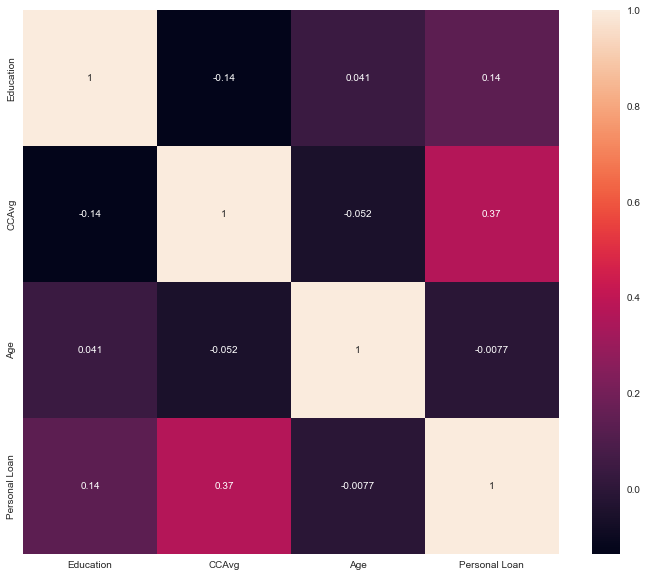

In [7]:
# HeatMap

plt.figure(figsize=(12,10))
heatmap = sns.heatmap(df[['Education', 'CCAvg','Age','Personal Loan']].corr(), annot =True)

In [8]:
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [12]:
df[df['Experience']<0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [13]:
df[df['Experience']<0]

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
89      90   25          -1     113     94303       4   2.30          3   
226    227   24          -1      39     94085       2   1.70          2   
315    316   24          -2      51     90630       3   0.30          3   
451    452   28          -2      48     94132       2   1.75          3   
524    525   24          -1      75     93014       4   0.20          1   
536    537   25          -1      43     92173       3   2.40          2   
540    541   25          -1     109     94010       4   2.30          3   
576    577   25          -1      48     92870       3   0.30          3   
583    584   24          -1      38     95045       2   1.70          2   
597    598   24          -2     125     92835       2   7.20          1   
649    650   25          -1      82     92677       4   2.10          3   
670    671   23          -1      61     92374       4   2.60          1   
686    687   24          -1      38     92612       4   0.60          2   
793    794   24          -2     150     94720       2   2.00          1   
889    890   24          -2      82     91103       2   1.60          3   
909    910   23          -1     149     91709       1   6.33          1   
1173  1174   24          -1      35     94305       2   1.70          2   
1428  1429   25          -1      21     94583       4   0.40          1   
1522  1523   25          -1     101     94720       4   2.30          3   
1905  1906   25          -1     112     92507       2   2.00          1   
2102  2103   25          -1      81     92647       2   1.60          3   
2430  2431   23          -1      73     92120       4   2.60          1   
2466  2467   24          -2      80     94105       2   1.60          3   
2545  2546   25          -1      39     94720       3   2.40          2   
2618  2619   23          -3      55     92704       3   2.40          2   
2717  2718   23          -2      45     95422       4   0.60          2   
2848  2849   24          -1      78     94720       2   1.80          2   
2876  2877   24          -2      80     91107       2   1.60          3   
2962  2963   23          -2      81     91711       2   1.80          2   
2980  2981   25          -1      53     94305       3   2.40          2   
3076  3077   29          -1      62     92672       2   1.75          3   
3130  3131   23          -2      82     92152       2   1.80          2   
3157  3158   23          -1      13     94720       4   1.00          1   
3279  3280   26          -1      44     94901       1   2.00          2   
3284  3285   25          -1     101     95819       4   2.10          3   
3292  3293   25          -1      13     95616       4   0.40          1   
3394  3395   25          -1     113     90089       4   2.10          3   
3425  3426   23          -1      12     91605       4   1.00          1   
3626  3627   24          -3      28     90089       4   1.00          3   
3796  3797   24          -2      50     94920       3   2.40          2   
3824  3825   23          -1      12     95064       4   1.00          1   
3887  3888   24          -2     118     92634       2   7.20          1   
3946  3947   25          -1      40     93117       3   2.40          2   
4015  4016   25          -1     139     93106       2   2.00          1   
4088  4089   29          -1      71     94801       2   1.75          3   
4116  4117   24          -2     135     90065       2   7.20          1   
4285  4286   23          -3     149     93555       2   7.20          1   
4411  4412   23          -2      75     90291       2   1.80          2   
4481  4482   25          -2      35     95045       4   1.00          3   
4514  4515   24          -3      41     91768       4   1.00          3   
4582  4583   25          -1      69     92691       3   0.30          3   
4957  4958   29          -1      50     95842       2   1.75          3   

      Mortgage  Personal Loan  S

In [14]:
df['Experience'] = abs(df['Experience'])
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.134600    73.774200  93152.503000   
std    1443.520003    11.463166    11.415189    46.033729   2121.852197   
min       1.000000    23.000000     0.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

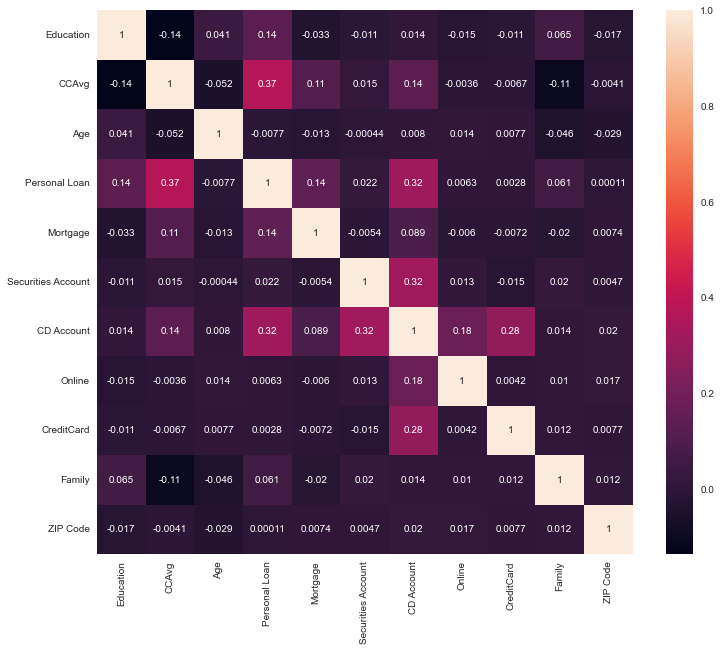

In [15]:
plt.figure(figsize=(12,10))
heatmap = sns.heatmap(df[['Education', 'CCAvg','Age','Personal Loan','Mortgage','Securities Account','CD Account','Online','CreditCard','Family','ZIP Code']].corr(), annot =True)

# Results from heat map
# The Personal loan highly depends on 

1. CCAvg
2. CD Account
3. Education, Mortgage
4. family
5. Securitites Account


In [16]:
# People with zero mortgage
df[df['Mortgage']==0]['Mortgage'].value_counts()

0    3462
Name: Mortgage, dtype: int64

In [17]:
# People with zeron creditcardAvg
df[df['CCAvg']==0]['CCAvg'].value_counts()

0.0    106
Name: CCAvg, dtype: int64

In [18]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [19]:
df.columns.nunique()

14

In [20]:
# vidulation categorical and numerical columns
categorical_variables = [col for col in df.columns if df[col].nunique()<=5]
print(categorical_variables)
continous_variables = [col for col in df.columns if df[col].nunique()>5]
print(continous_variables)

['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


In [21]:
categorical_variables=[col for col in df.columns if df[col].nunique()<=5]
print(categorical_variables)
continuous_variables=[col for col in df.columns if df[col].nunique()>5]
print(continuous_variables)

['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


# EDA- Exploratory Data Analysis

In [22]:
# Checking categorical Data 
print(df['Family'].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


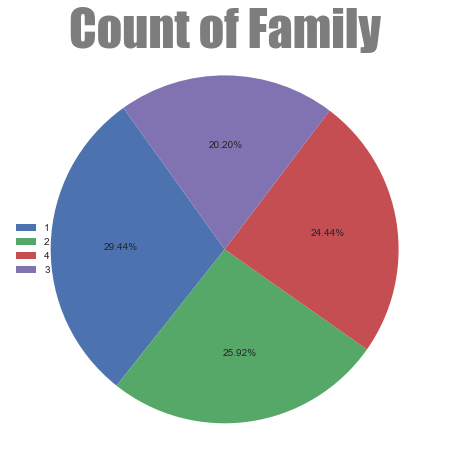

In [23]:
size = df.Family.value_counts().values/10
lbl = df.Family.value_counts().index
plt.figure(figsize = (10,8))
plt.title('Count of Family', fontname = "Impact", fontsize=50,y=0.95,alpha = 0.6)
plt.pie(size, startangle = 125.6, autopct = '%1.2f%%')
plt.legend(labels = lbl, loc = 'center left') # help for plot
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use ei

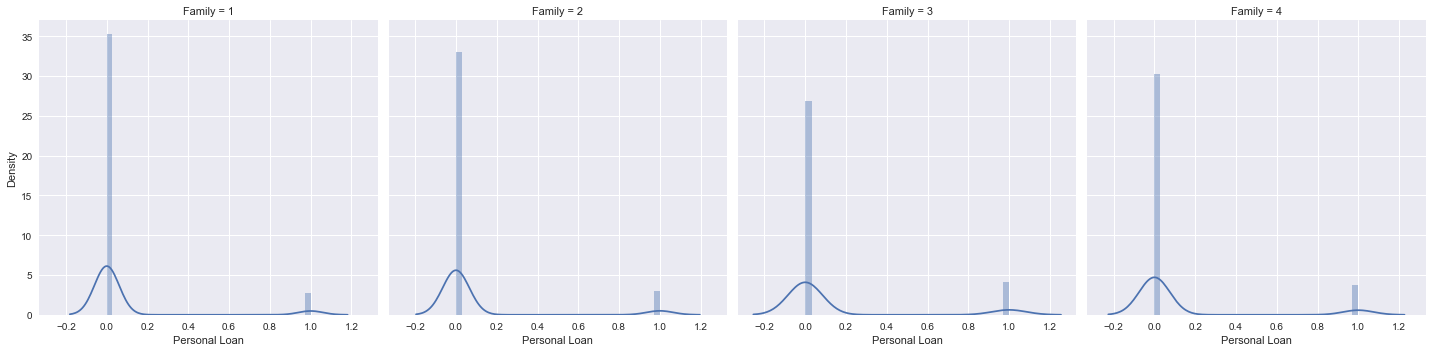

In [24]:
family_visuals = sns.FacetGrid(df, col = 'Family', size = 5)
family_visuals = family_visuals.map(sns.distplot,'Personal Loan')

In [25]:
print(df['Education'].value_counts())

1    2096
3    1501
2    1403
Name: Education, dtype: int64


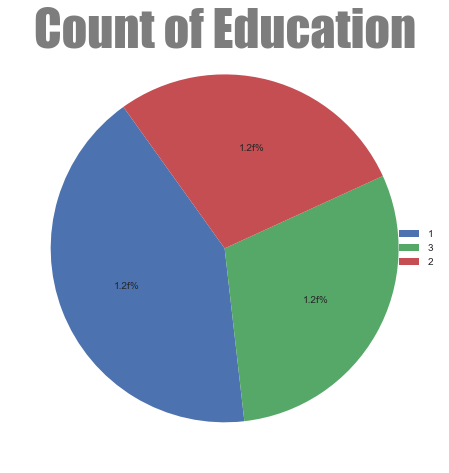

"size =df.Education.value_counts().values/10 #List for take sizes\nlbl=df.Education.value_counts().index\nplt.figure(figsize=(10,8)) #Size of plot\nplt.title('Count of Education',fontname='Impact',fontsize=50,y=.95,alpha=0.6) #Title\nplt.pie(size ,startangle=125.6,autopct='%1.2f%%') #Pieplot\nplt.legend(labels=lbl,loc='center left') #Help for plot\nplt.show()"

In [26]:
size = df.Education.value_counts().values/10 
lbl = df.Education.value_counts().index
plt.figure(figsize = (10,8))
plt.title('Count of Education', fontname ='Impact', fontsize = 50, y=0.95, alpha = 0.6)
plt.pie(size, startangle = 125.6, autopct="1.2f%%")
plt.legend(labels= lbl, loc='center right')
plt.show()
'''size =df.Education.value_counts().values/10 #List for take sizes
lbl=df.Education.value_counts().index
plt.figure(figsize=(10,8)) #Size of plot
plt.title('Count of Education',fontname='Impact',fontsize=50,y=.95,alpha=0.6) #Title
plt.pie(size ,startangle=125.6,autopct='%1.2f%%') #Pieplot
plt.legend(labels=lbl,loc='center left') #Help for plot
plt.show()'''

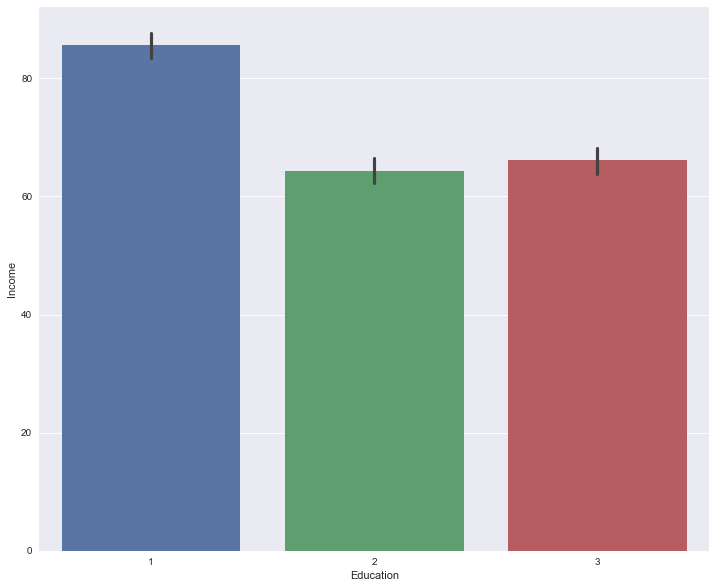

In [27]:
plt.figure(figsize=(12,10))

education_level_plot = sns.barplot(x='Education',y = 'Income', data = df)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



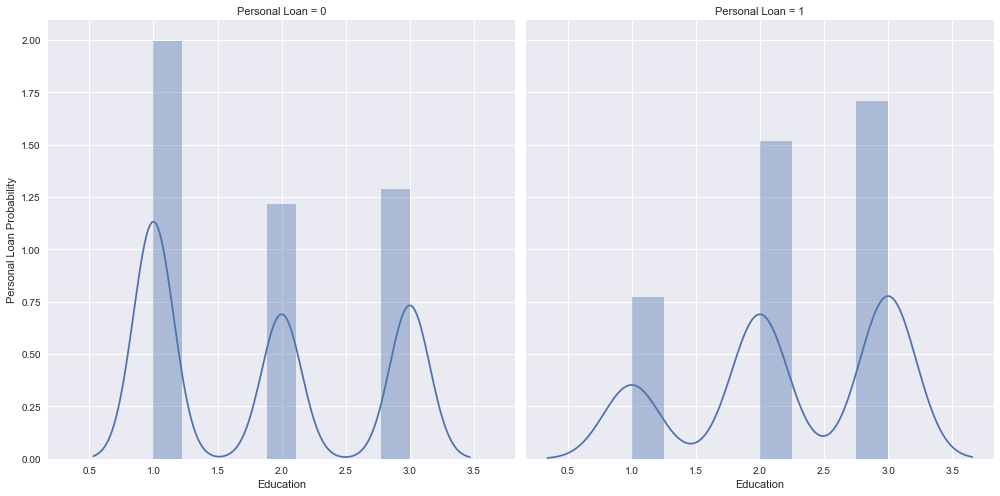

In [28]:
income_loan_visual = sns.FacetGrid(df,col='Personal Loan', height=7)
income_loan_visual = income_loan_visual.map(sns.distplot, 'Education')
income_loan_visual = income_loan_visual.set_ylabels('Personal Loan Probability')

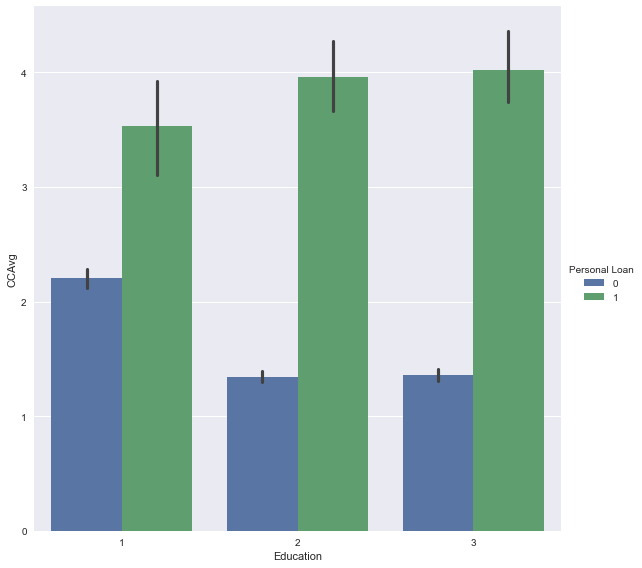

In [29]:
education_loan_income = sns.catplot(x='Education',y='CCAvg',hue='Personal Loan', data = df ,kind = 'bar', height = 8)


#### People with High CCAvg have high probability of accepting the loan

In [30]:
print(df['Personal Loan'].value_counts())

0    4520
1     480
Name: Personal Loan, dtype: int64


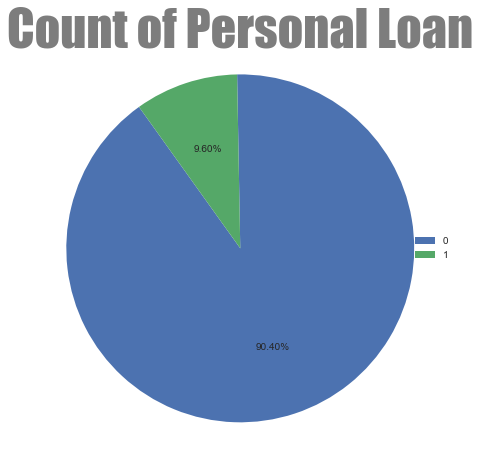

In [31]:
size = df['Personal Loan'].value_counts().values/10  # list for take sizes
lbl = df['Personal Loan'].value_counts().index
plt.figure(figsize=(10,8)) # Size of plot
plt.title('Count of Personal Loan', fontname='Impact', fontsize=50,y=0.95, alpha=0.6)
plt.pie(size, startangle = 125.6, autopct='%1.2f%%')
plt.legend(labels=lbl,loc='center right')
plt.show()

### 9% people have borrowed the loan before

In [32]:
print(df['Securities Account'].value_counts())

0    4478
1     522
Name: Securities Account, dtype: int64


In [33]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [34]:
df[df['Securities Account']==1]

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
12      13   48          23     114     93106       2    3.8          3   
14      15   67          41     112     91741       1    2.0          1   
19      20   55          28      21     94720       1    0.5          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4912  4913   51          26      28     94061       1    1.3          2   
4917  4918   36          10      33     95616       4    1.2          2   
4956  4957   39          13      59     94109       4    0.2          3   
4959  4960   51          27      55     93014       1    1.6          2   
4971  4972   58          28      73     90024       1    1.4          3   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
12           0              0                   1           0       0   
14           0              0                   1           0       0   
19           0              0                   1           0       0   
...        ...            ...                 ...         ...     ...   
4912        94              0                   1           0       1   
4917        82              0                   1           0       1   
4956         0              0                   1           0       0   
4959       197              0                   1           0       1   
4971         0              0                   1           0       0   

      CreditCard  
0              0  
1              0  
12             0  
14             0  
19             1  
...          ...  
4912           0  
4917           0  
4956           1  
4959           0  
4971           0  

[522 rows x 14 columns]

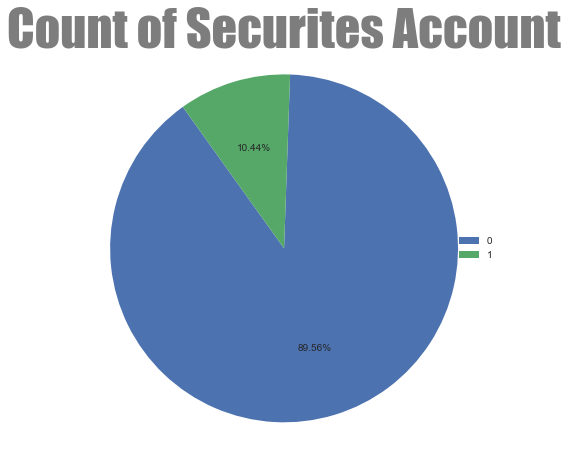

In [35]:
# Pie Chart of Securite Account
size = df['Securities Account'].value_counts().values/10
lbl = df['Securities Account'].value_counts().index
plt.figure(figsize=(10,8))
plt.title("Count of Securites Account",fontname='Impact',fontsize=50,y=0.95, alpha=0.6)
plt.pie(size, startangle=125.6, autopct="%1.2f%%")
plt.legend(labels=lbl,loc='center right')
plt.show()

### 89% Customers don't have security account

In [36]:
print(df['CD Account'].value_counts())

0    4698
1     302
Name: CD Account, dtype: int64


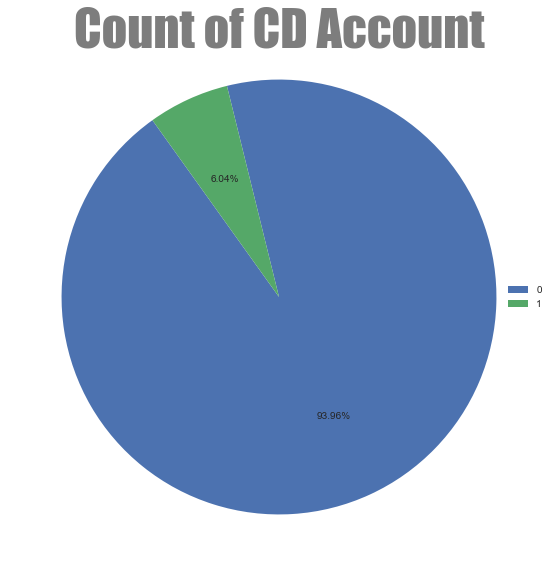

In [37]:
size = df['CD Account'].value_counts().values/10
lbl = df['CD Account'].value_counts().index
plt.figure(figsize=(12,10))
plt.title('Count of CD Account', fontname='Impact',fontsize=50, y=0.95, alpha=0.6)
plt.pie(size, startangle=125.6, autopct='%1.2f%%')
plt.legend(labels=lbl,loc='center right')
plt.show()

#### Only 6.04% people have CD Account

In [38]:
print(df['Online'].value_counts())

1    2984
0    2016
Name: Online, dtype: int64


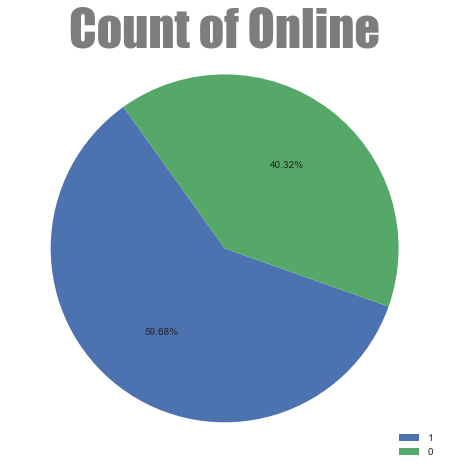

In [39]:
size= df['Online'].value_counts().values/10
lbl=df['Online'].value_counts().index
plt.figure(figsize=(10,8))
plt.title("Count of Online",fontname="Impact",fontsize=50,y=0.95,alpha=0.6)
plt.pie(size,startangle=125.6, autopct='%1.2f%%')
plt.legend(labels=lbl,loc='lower right')
plt.show()

#### 40% percent people are not online

In [40]:
print(df['CreditCard'].value_counts())

0    3530
1    1470
Name: CreditCard, dtype: int64


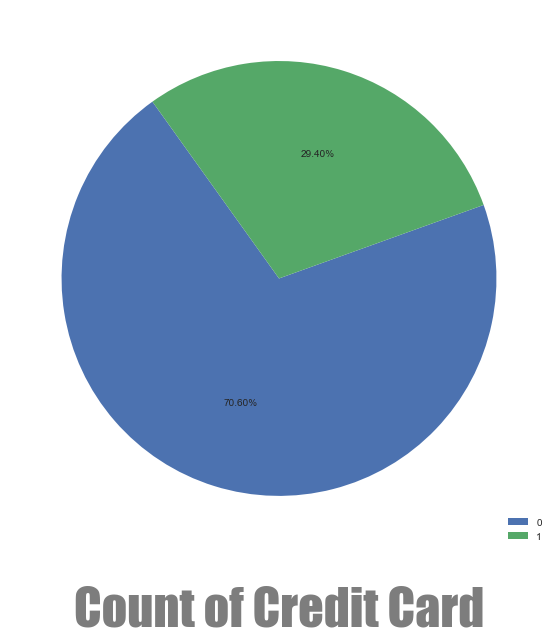

In [41]:
size=df['CreditCard'].value_counts().values/10
lbl= df['CreditCard'].value_counts().index
plt.figure(figsize=(12,10))
plt.title('Count of Credit Card', fontname='Impact',fontsize=50, y=-0.15, alpha=0.6)
plt.pie(size, startangle=125.6, autopct='%1.2f%%')
plt.legend(labels=lbl,loc='lower right')
plt.show()

##### 70% customers don't have credit card

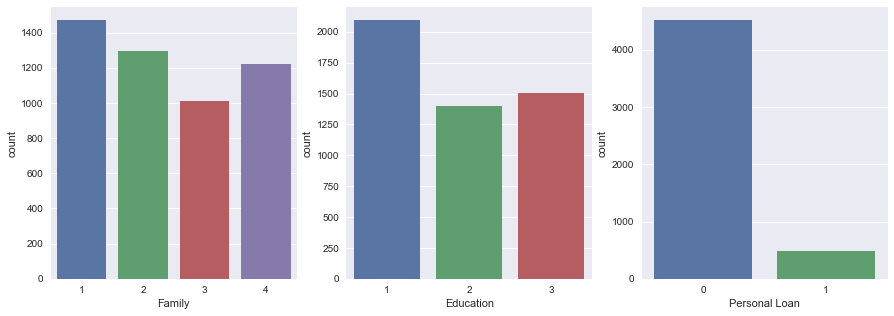

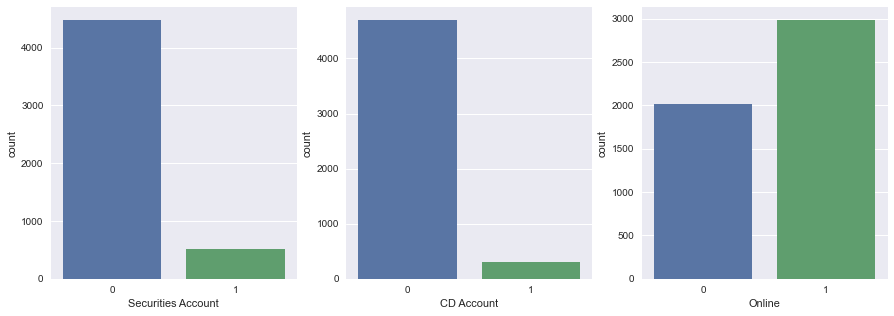

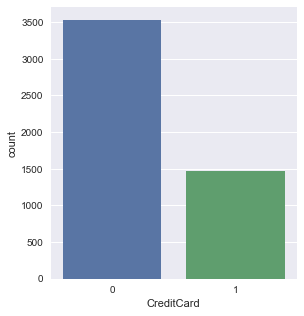

In [42]:
# Checking Categorical Data with Countplot
cate_cols =['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']

i=0
while i<8:
    fig=plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.countplot(x=cate_cols[i], data=df)
    i+=1
    if i==7:
        break
    plt.subplot(1,3,2)
    sns.countplot(x=cate_cols[i],data=df)
    i+=1
    plt.subplot(1,3,3)
    sns.countplot(x=cate_cols[i],data=df)
    i+=1
    
    plt.show()

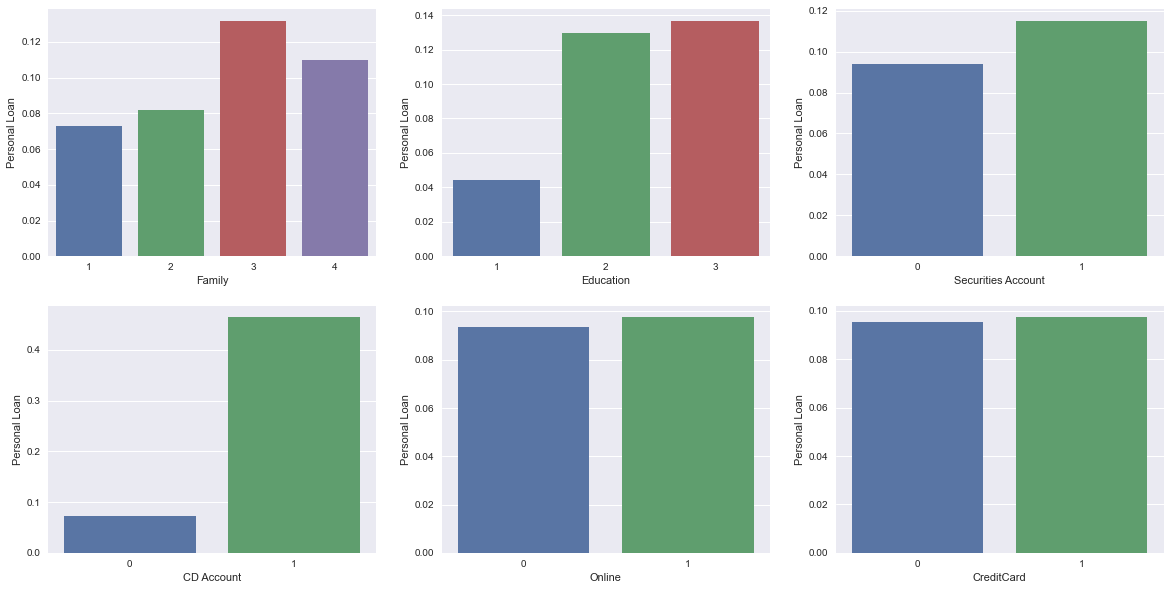

In [43]:
# Categorical Features and Target

cate_cols = ['Family','Education','Securities Account','CD Account','Online','CreditCard']
fig=plt.figure(figsize=(20,10))
for i, col in enumerate(cate_cols):
    ax=fig.add_subplot(2,3,i+1)
    sns.barplot(x=col, y='Personal Loan', data=df, ci=None)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



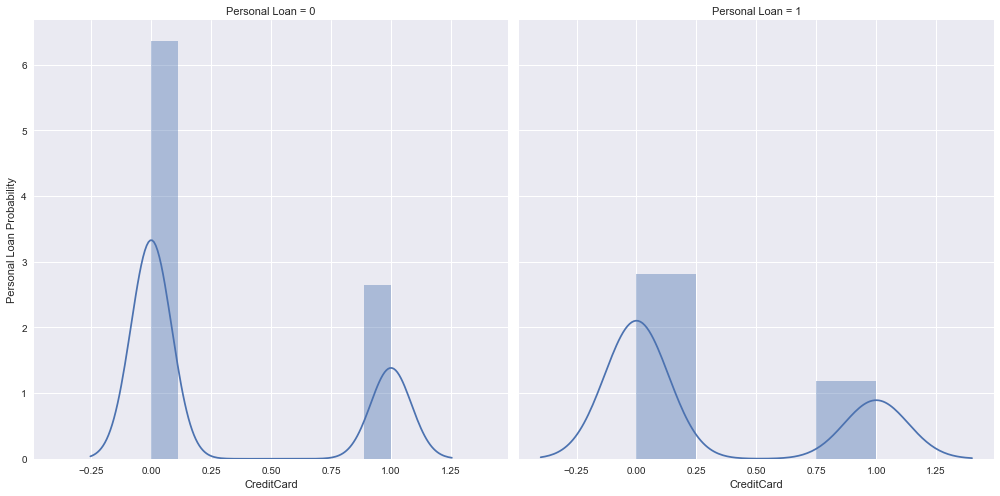

In [44]:
creditcard_loan_visual = sns.FacetGrid(df,col='Personal Loan', height=7)
creditcard_loan_visual = creditcard_loan_visual.map(sns.distplot, 'CreditCard')
creditcard_loan_visual = creditcard_loan_visual.set_ylabels('Personal Loan Probability')

<AxesSubplot:xlabel='Education', ylabel='Income'>

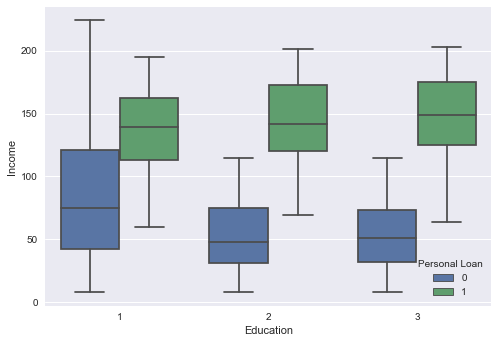

In [46]:
# influence of income and education on personal loan
sns.boxplot(x='Education',y='Income', hue='Personal Loan', data=df)

#### Observation : People with only graduation degree have more income

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

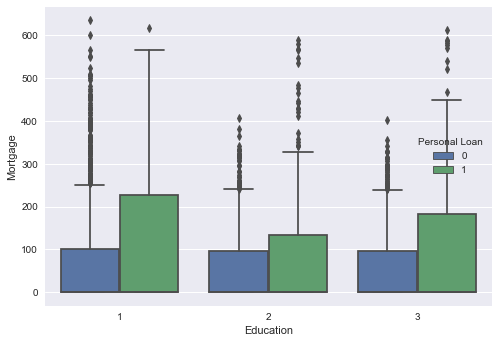

In [48]:
#influence of income and mortagage on personal loan
sns.boxplot(x='Education',y='Mortgage',hue='Personal Loan',data=df)

In [49]:
Q1 = df.quantile(.25)
Q3= df.quantile(.75)

IQR=Q3-Q1

In [50]:
IQR

ID                    2499.5
Age                     20.0
Experience              20.0
Income                  59.0
ZIP Code              2697.0
Family                   2.0
CCAvg                    1.8
Education                2.0
Mortgage               101.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   1.0
CreditCard               1.0
dtype: float64

In [51]:
df1 = df.copy()

In [63]:
df_out = df1[~(df1<(Q1-1.5*IQR))| (df1>(1+1.5*IQR)).any(axis=1)]

In [64]:
df_out.shape

(5000, 14)

In [65]:
df.shape

(5000, 14)

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

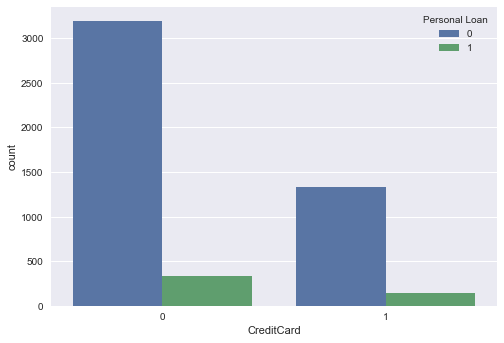

In [56]:
sns.countplot(x="CreditCard",hue='Personal Loan',data =df)

##### Most people who don't have credit card doen't havelaon as well

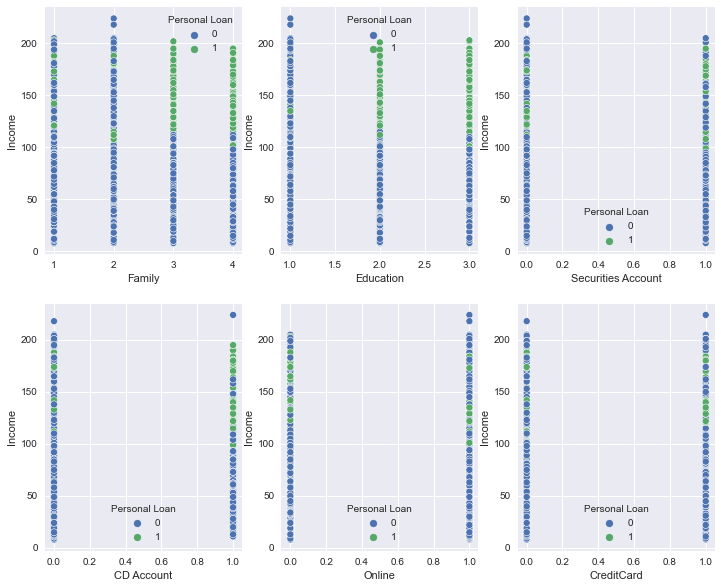

In [59]:
# influence of income on categorical feature
# scatter plot for feature and income

fig = plt.figure(figsize=(12,10))
for i, col in enumerate(cate_cols):
    ax= fig.add_subplot(2,3,i+1)
    sns.scatterplot(x=col,y='Income',hue='Personal Loan',data=df)

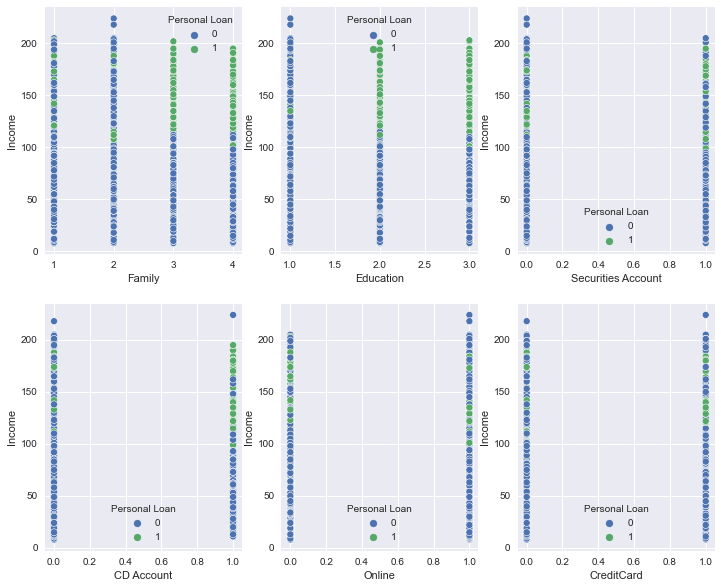

In [60]:
fig = plt.figure(figsize=(12,10))
for i, col in enumerate(cate_cols):
    ax= fig.add_subplot(2,3,i+1)
    sns.scatterplot(x=col,y='Income',hue='Personal Loan',data=df_out)

##### Observation: Candidates with  higher degrees and have familsize greater than 3 with high income have personal loan.
####  Customers with CD Accounts have high chances of having personal Loan

## Checking numerical Data

Text(0, 0.5, 'Personal Loan')

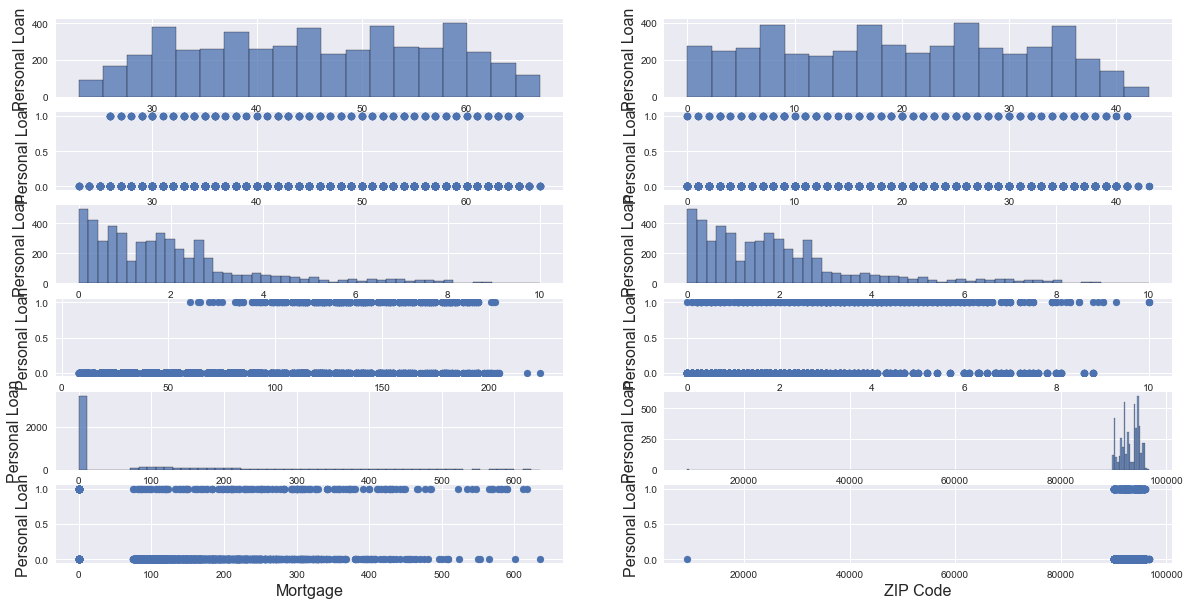

In [70]:
# Checking for noise with scatter plot
plt.figure(figsize=(20,10))



plt.subplot(6,2,1)
sns.histplot(df.Age)
plt.xlabel('Age',fontsize=16)
plt.ylabel('Personal Loan',fontsize=16)




plt.subplot(6,2,2)
sns.histplot(df.Experience)
plt.xlabel('Experience', fontsize=16)
plt.ylabel('Personal Loan',fontsize=16)




plt.subplot(6,2,3)
plt.scatter(df.Age,df['Personal Loan'])
plt.xlabel('Age',fontsize=16)
plt.ylabel('Personal Loan',fontsize=16)





plt.subplot(6,2,4)
plt.scatter(df.Experience,df['Personal Loan'])
plt.xlabel('Experience',fontsize=16)
plt.ylabel('Personal Loan',fontsize=16)




plt.subplot(6,2,5)
sns.histplot(df.CCAvg)
plt.xlabel('Income',fontsize=16)
plt.ylabel('Personal Loan',fontsize=16)




plt.subplot(6,2,6)
sns.histplot(df.CCAvg)
plt.xlabel('CCAvg',fontsize=16)
plt.ylabel('Personal Loan',fontsize=16)




plt.subplot(6,2,7)
plt.scatter(df.Income, df['Personal Loan'])
plt.xlabel('Income', fontsize=16)
plt.ylabel('Personal Loan', fontsize=16)




plt.subplot(6,2,8)
plt.scatter(df.CCAvg,df['Personal Loan'])
plt.xlabel('CCAvg',fontsize=16)
plt.ylabel('Personal Loan',fontsize=16)




plt.subplot(6,2,9)
sns.histplot(df.Mortgage)
plt.xlabel('Mortgage',fontsize=16)
plt.ylabel('Personal Loan',fontsize=16)




plt.subplot(6,2,10)
sns.histplot(df['ZIP Code'])
plt.xlabel('ZIP Code',fontsize=16)
plt.ylabel('Personal Loan',fontsize=16)




plt.subplot(6,2,11)
plt.scatter(df.Mortgage,df['Personal Loan'])
plt.xlabel('Mortgage', fontsize=16)
plt.ylabel('Personal Loan',fontsize=16)



plt.subplot(6,2,12)
plt.scatter(df['ZIP Code'],df['Personal Loan'])
plt.xlabel('ZIP Code',fontsize=16)
plt.ylabel('Personal Loan',fontsize=16)

In [72]:
# noise ZIP Code<20000
noise1 =df[df['ZIP Code']<20000]
noise1

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
384  385   51          25      21      9307       4    0.6          3   

     Mortgage  Personal Loan  Securities Account  CD Account  Online  \
384         0              0                   0           0       1   

     CreditCard  
384           1

In [73]:
df.drop(df[df['ZIP Code']<20000].index,inplace=True)

In [74]:
df.reset_index(drop=True, inplace=True)

Text(0, 0.5, 'Personal Loan')

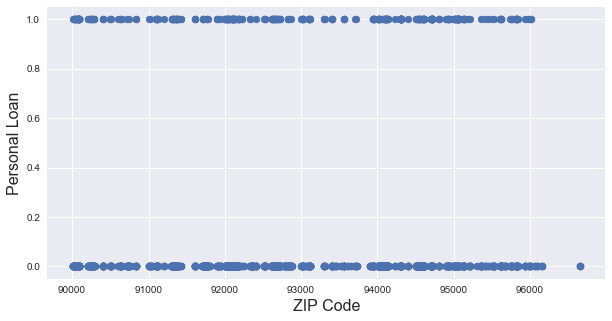

In [76]:
# ZipCode after drop noise
plt.figure(figsize=(10,5))
plt.scatter(df['ZIP Code'],df['Personal Loan'])
plt.xlabel('ZIP Code',fontsize=16)
plt.ylabel('Personal Loan',fontsize=16)

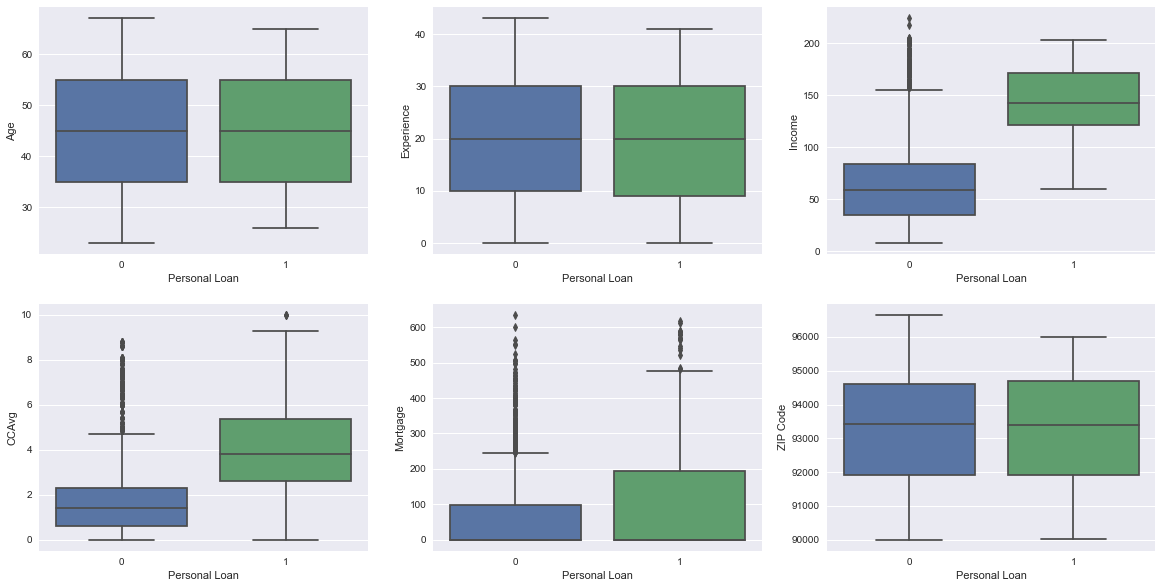

In [82]:
# Checking numerical data count
nume_cols=['Age','Experience','Income','CCAvg','Mortgage','ZIP Code']
fig = plt.figure(figsize=(20,10))
for i,col in enumerate(nume_cols):
    ax = fig.add_subplot(2,3,i+1)
    sns.boxplot(y=df[col],x=df['Personal Loan'])

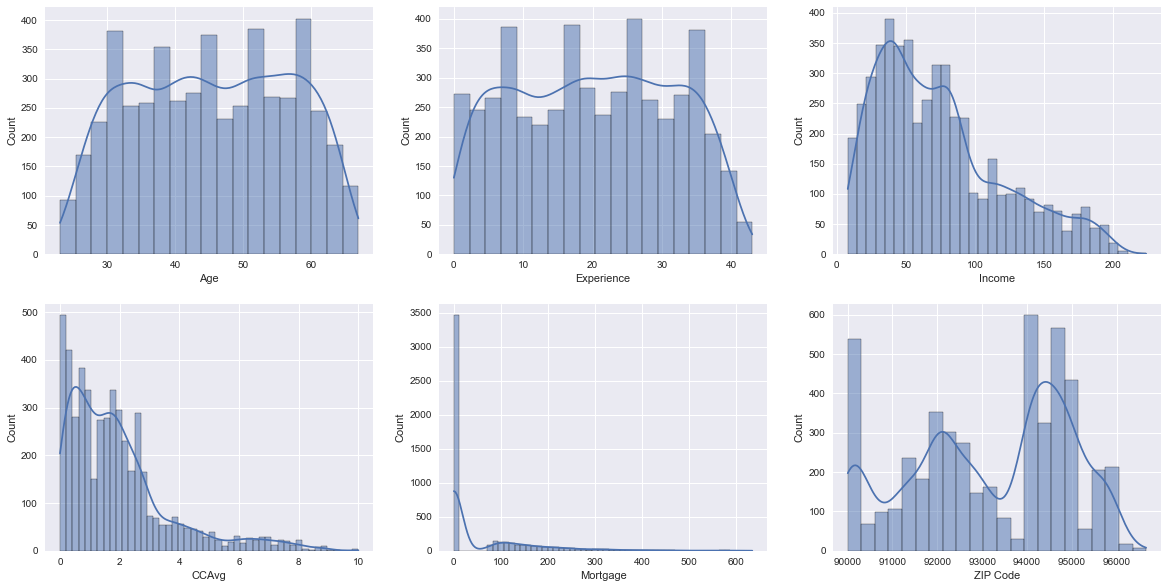

In [83]:
# Checking distribution of numerical data
fig = plt.figure(figsize=(20,10))

for i,col in enumerate(nume_cols):
    ax=fig.add_subplot(2,3,i+1)
    sns.histplot(df[col], kde= True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Program

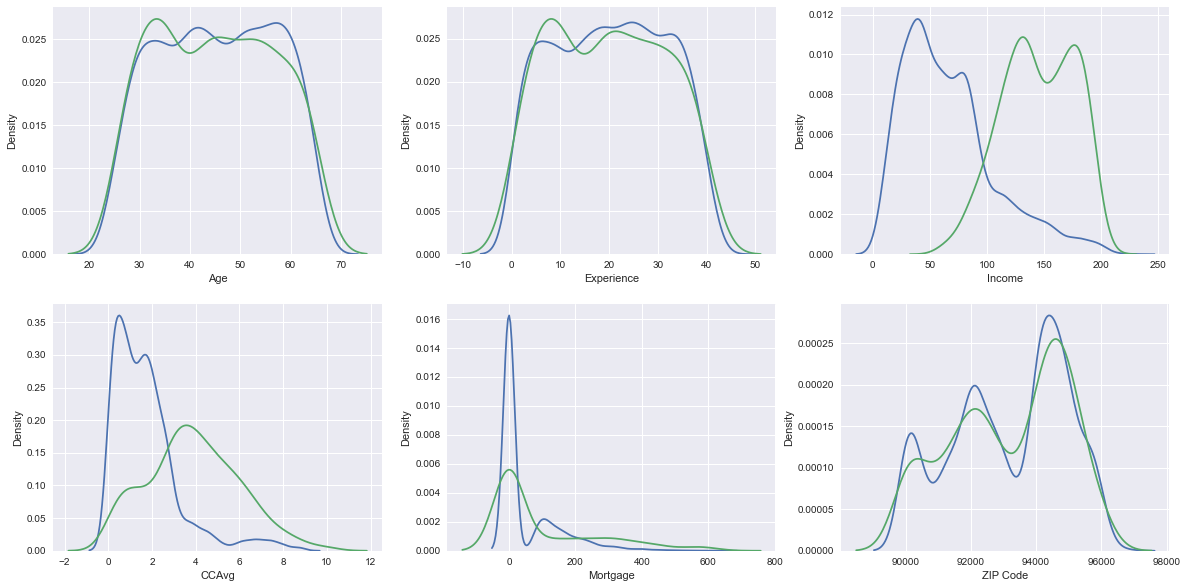

In [87]:
# Checking Variables of numerical data
fig=plt.figure(figsize=(20,10))

for i,col in enumerate(nume_cols):
    ax=fig.add_subplot(2,3,i+1)
    ax1= sns.distplot(df[col][df['Personal Loan']== 0],hist= False, kde=True, label='No Personal Loan')
    sns.distplot(df[col][df['Personal Loan']==1],hist= False, kde= True, ax=ax1, label='Personal Loan')

In [88]:
# Analysis Income with other attributes
# making a copy of nume_cols
num =nume_cols.copy()
num

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'ZIP Code']

In [89]:
num.remove('Income')

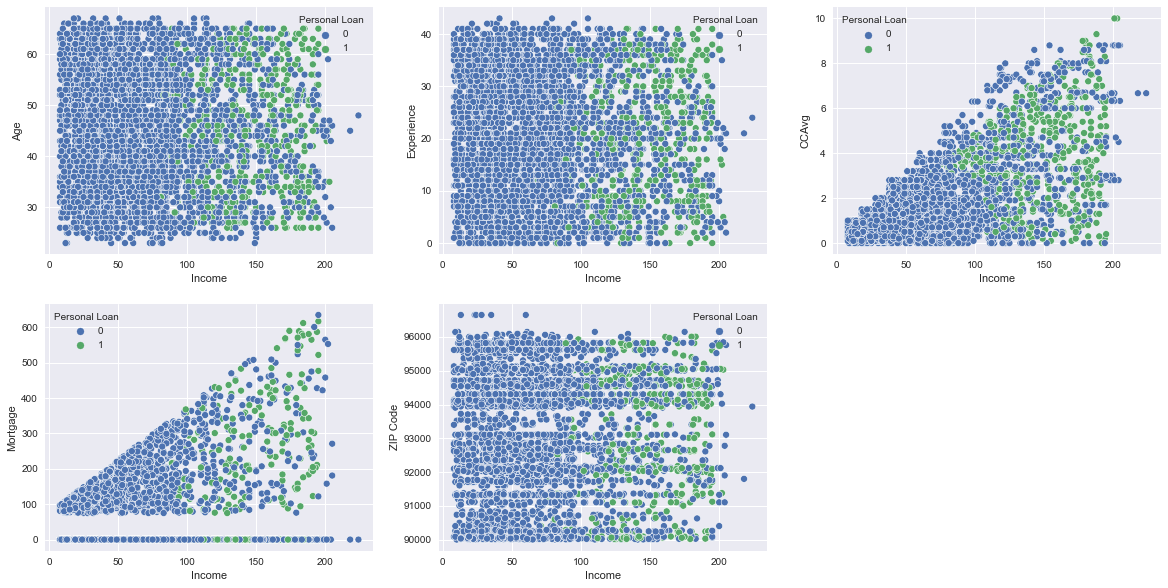

In [90]:
fig=plt.figure(figsize=(20,10))

for i,col in enumerate(num):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(x='Income',y=col,hue='Personal Loan',data=df)

In [91]:
'''
Obervation:
1. Age and experience have no effect much on customer with higher income no 
    matter of what age group have chances of high Personal Loan.
2. ZIP Code shows that all the customers are of particular area and they have
    no pattern in chanes of having personal loan
3. Customers with high income and haiving perosnal loan shows high Avg. 
    spending on credit cards per month and high value of house mortgage.
'''


'\nObervation:\n1. Age and experience have no effect much on customer with higher income no \n    matter of what age group have chances of high Personal Loan.\n2. ZIP Code shows that all the customers are of particular area and they have\n    no pattern in chanes of having personal loan\n3. Customers with high income and haiving perosnal loan shows high Avg. \n    spending on credit cards per month and high value of house mortgage.\n'

In [93]:
# After income we wil find relation of CCAvg with other attributes
num.remove('CCAvg')

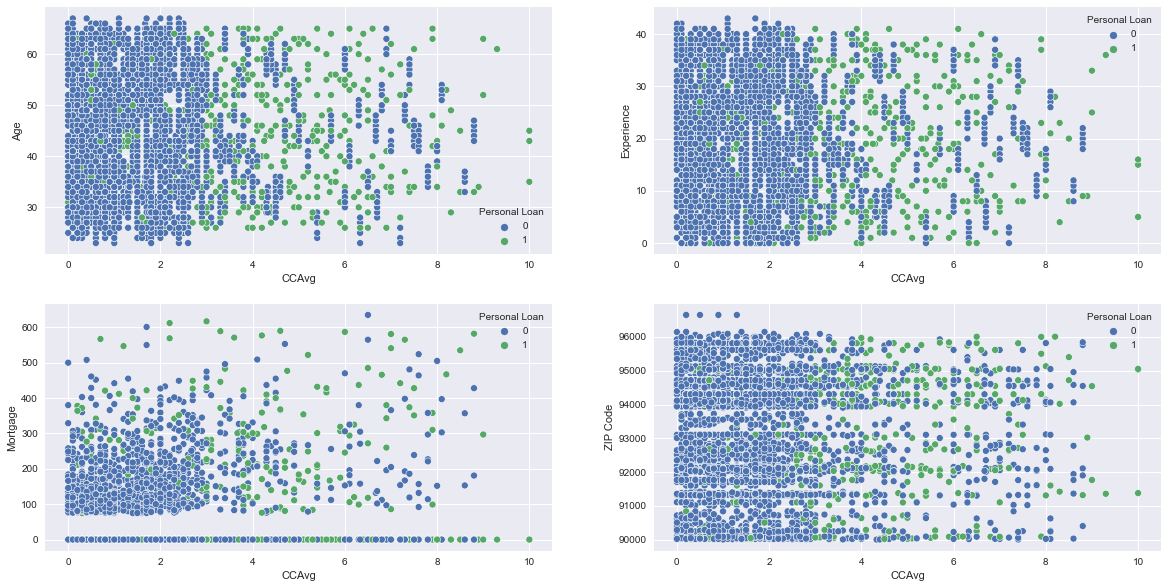

In [97]:
fig = plt.figure(figsize=(20,10))

for i,col in enumerate(num):
    ax=fig.add_subplot(2,2,i+1)
    sns.scatterplot(x='CCAvg',y=col,hue='Personal Loan',data=df)

In [98]:
# Observation:
'''
1. Age and Experience show some patterns on customes with personal loan or not
2. CCAvg and Mortgage have more chances of customer having Personal Loan
'''

'\n1. Age and Experience show some patterns on customes with personal loan or not\n2. CCAvg and Mortgage have more chances of customer having Personal Loan\n'

In [99]:
# A function that returns value counts for a columns split by Personal Loan

def groupby_get_cc_count(tdf, col):
    tdf= tdf.groupby([col,'Personal Loan'])['Personal Loan'].count().reset_index(level=0)
    tdf.columns = [col,'count']
    tdf= tdf.reset_index()
    return tdf

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 0, 'Age bins'), Text(0, 0.5, 'count of customers')]

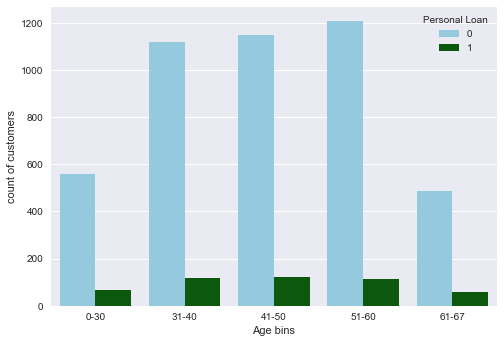

In [102]:
# Age Classification to obtain information from range of age
df['Age_bin'] = pd.cut(df['Age'],bins=[0,30,40,50,60,100], labels=['0-30','31-40','41-50','51-60','61-67'])
xx = groupby_get_cc_count(df[['Age_bin','Personal Loan']],'Age_bin')
ax=sns.barplot(xx['Age_bin'],xx['count'], hue= xx['Personal Loan'], palette = ['skyblue','darkgreen']);
ax.set(xlabel='Age bins',ylabel='count of customers')

In [103]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard Age_bin  
0              0                   1           0       0           0    0-30  
1              0                   1           0       0           0   41-50  
2              0                   0           0       0           0   31-40  
3              0                   0           0       0           0   31-40  
4              0                   0           0       0           1   31-40

In [104]:
# Observation : There are a lot of people in the age range of 51-60 but the people 
#  in teh age 41-50 have the highest number of customers with a personal loan

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



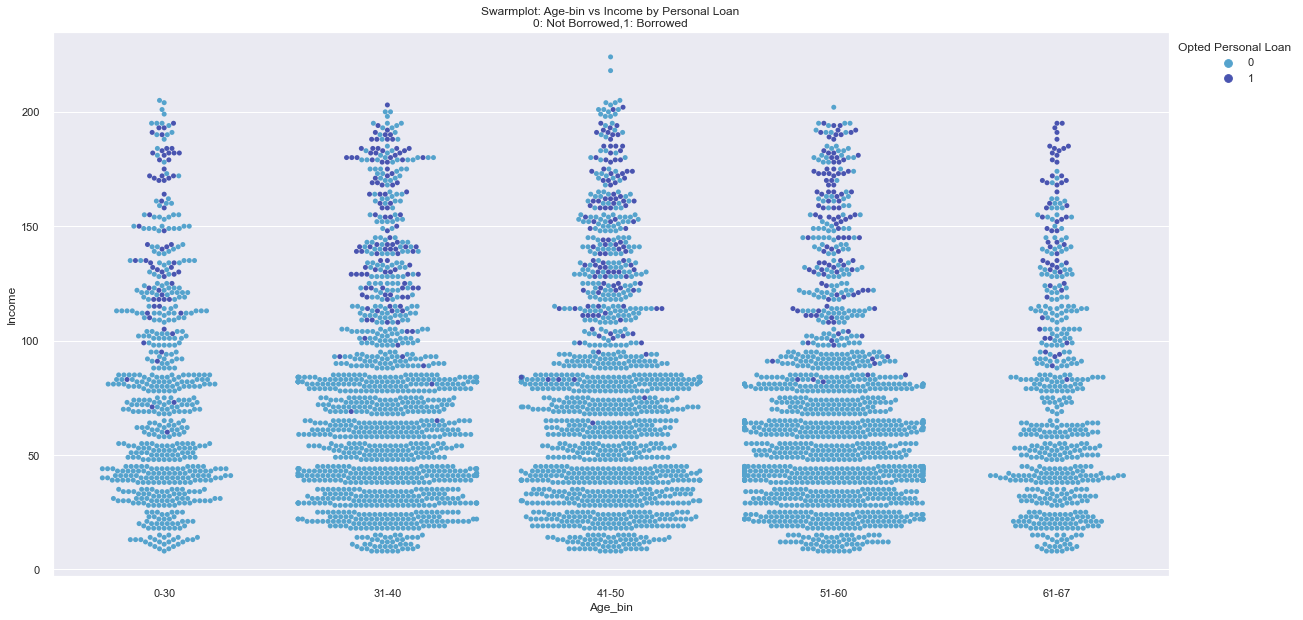

In [108]:
# Below code shows swarn plot for customers by Income and Age_bin, seggreagted by Personal loan opted or not

sns.set(palette='icefire')
plt.figure(figsize=(20,10))
sns.swarmplot(data=df,x='Age_bin', y='Income',hue='Personal Loan').set(title='Swarmplot: Age-bin vs Income by Personal Loan\n0: Not Borrowed,1: Borrowed');
plt.legend(loc='upper left',title='Opted Personal Loan',bbox_to_anchor=(1,1));

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 0, 'Mortgage bins'), Text(0, 0.5, 'Count of Customers')]

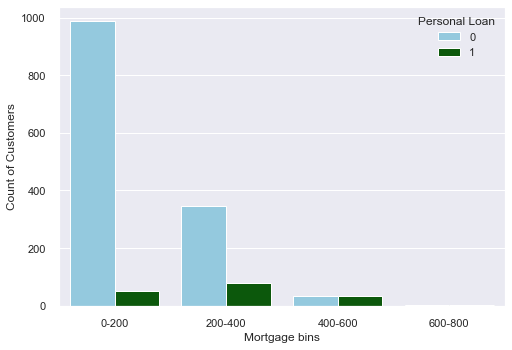

In [109]:
# mortgage classification to obtain information from range of mortgage.
df['mort_bin']=pd.cut(df['Mortgage'],bins = [0,200,400,600,800], labels=['0-200','200-400','400-600','600-800'])
xx = groupby_get_cc_count(df[['mort_bin','Personal Loan']],'mort_bin')
ax = sns.barplot(xx['mort_bin'],xx['count'], hue = xx['Personal Loan'], palette=['skyblue','darkgreen']);
ax.set(xlabel = 'Mortgage bins',ylabel = 'Count of Customers')

In [110]:
# Observation : Majority of the customers are in range of 0-200 mortgage but
# the number of people with personal loan is the highest in the 200-400

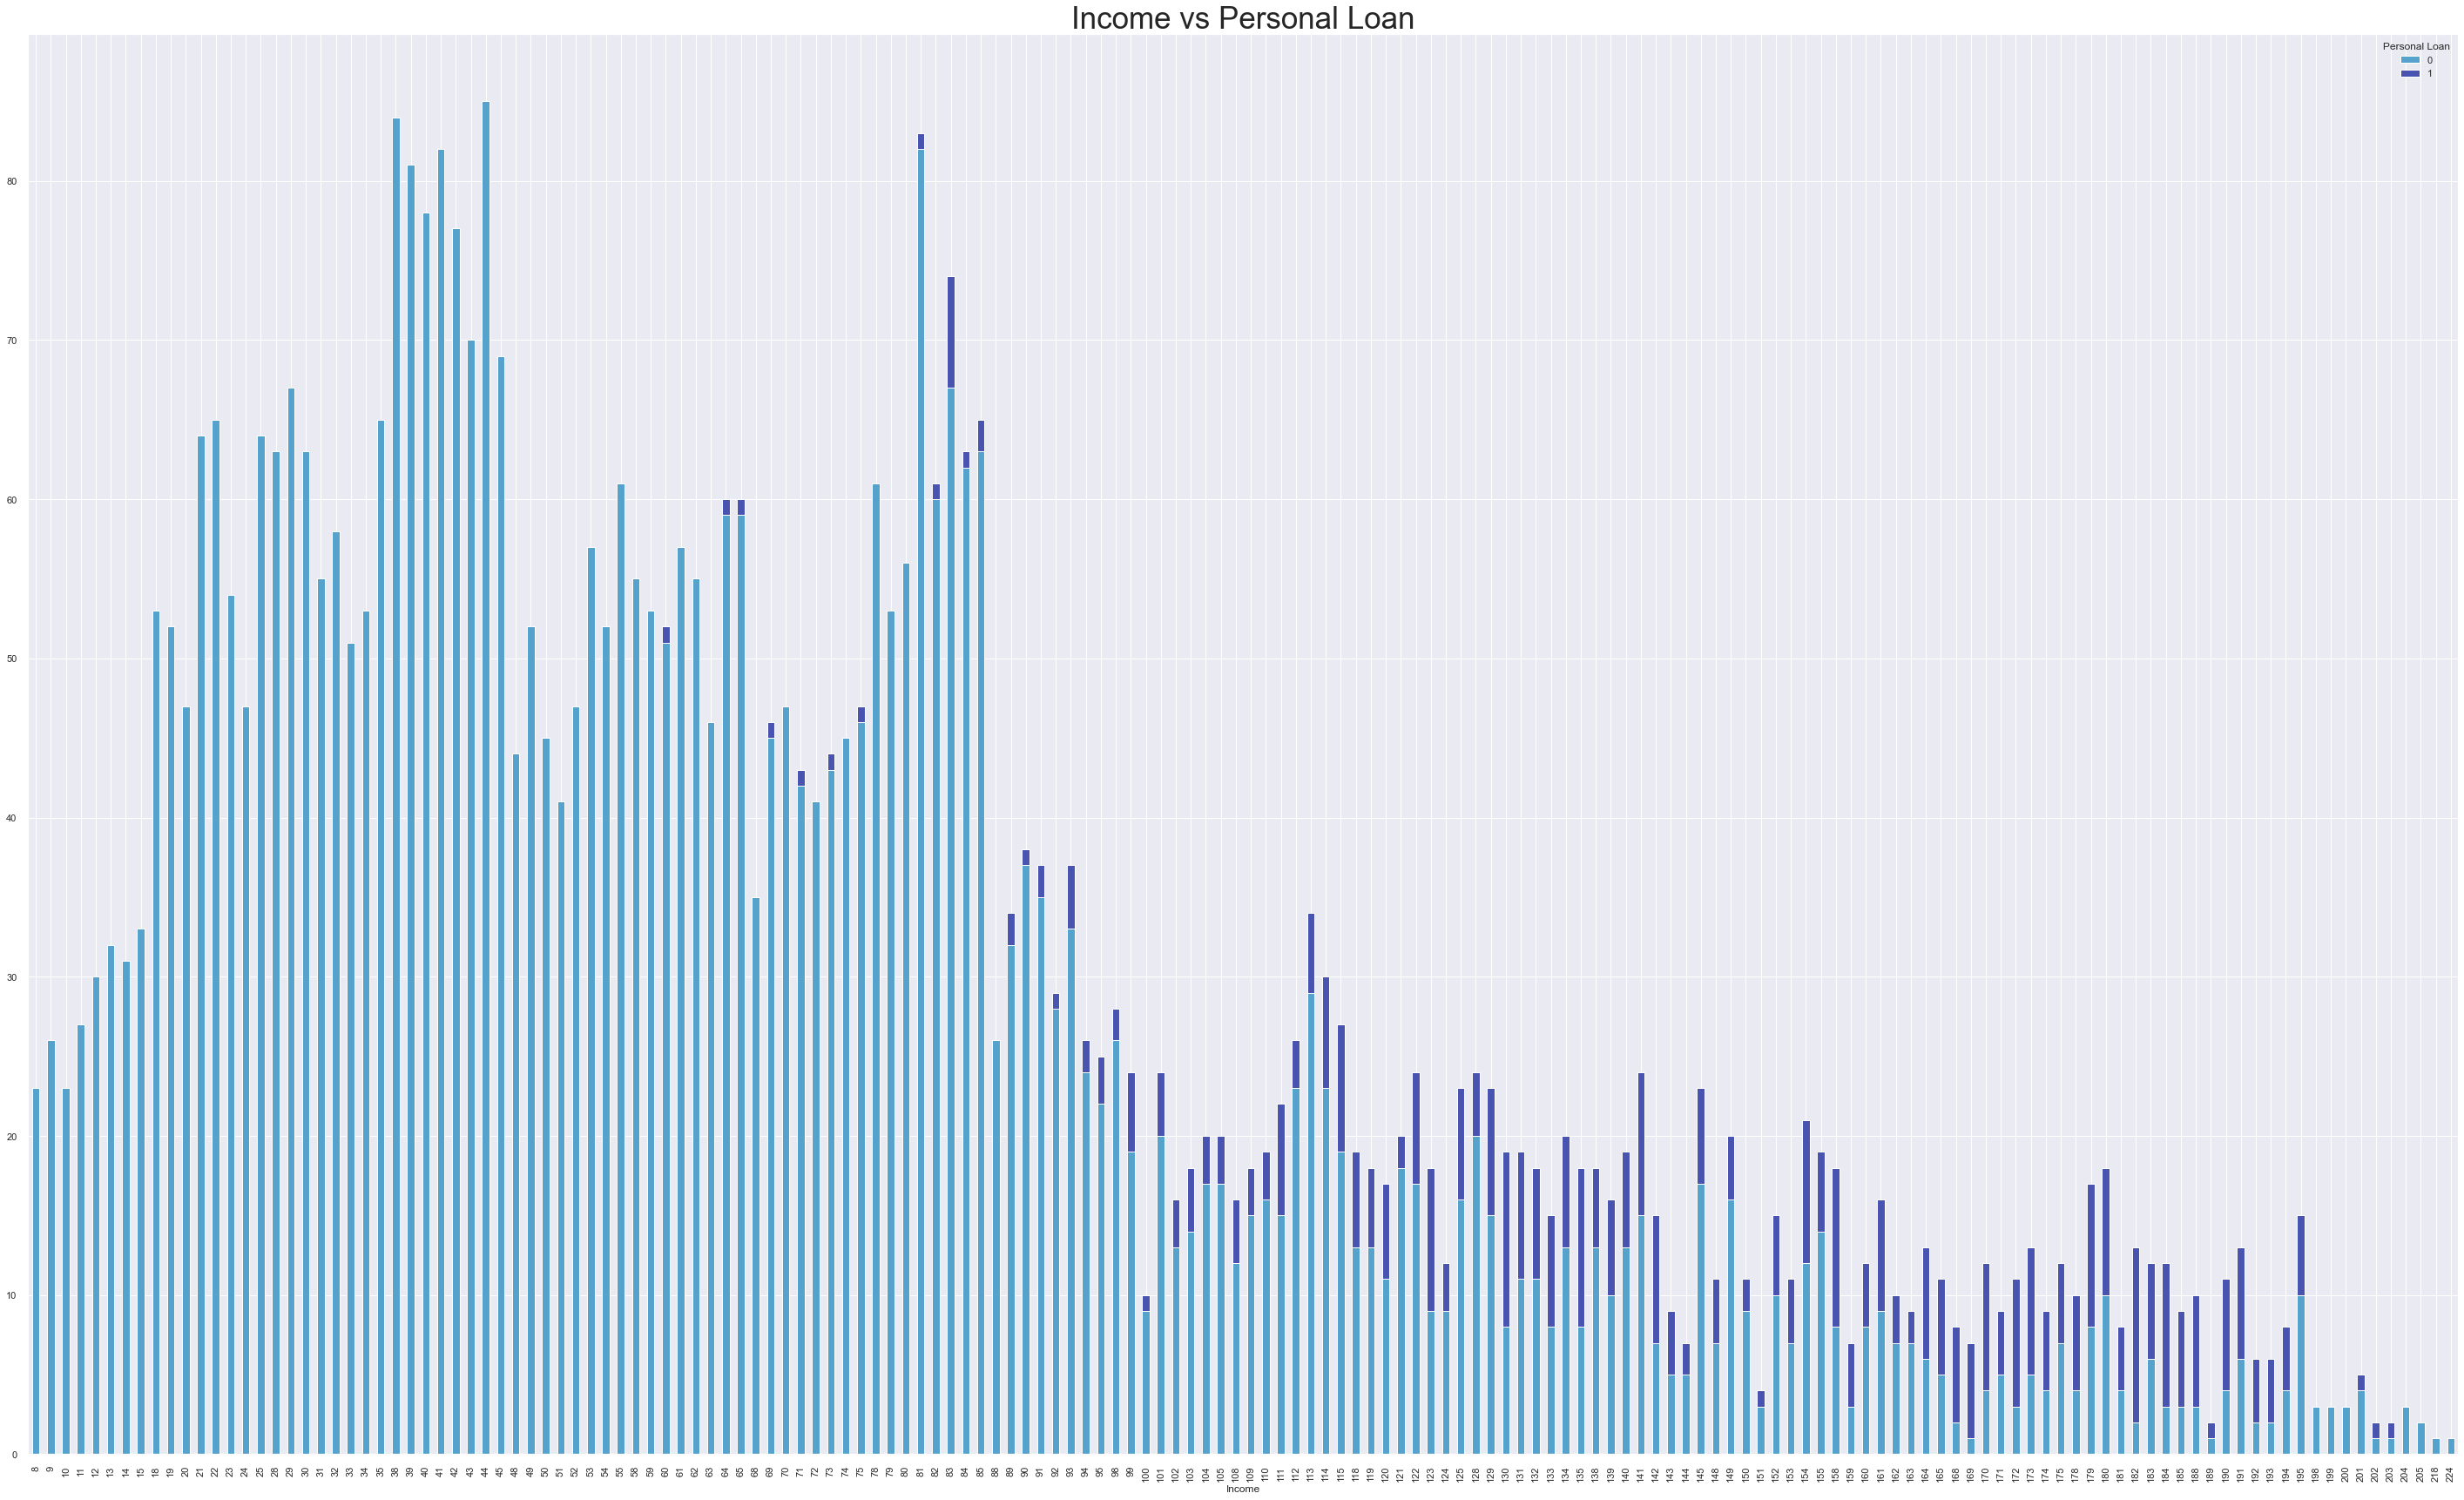

In [111]:
# Influence of income on personal Loan.
df.groupby(['Income','Personal Loan']).size().unstack().plot(kind='bar', stacked=True, figsize=(50,30))
plt.title('Income vs Personal Loan',fontsize=35)

plt.show()

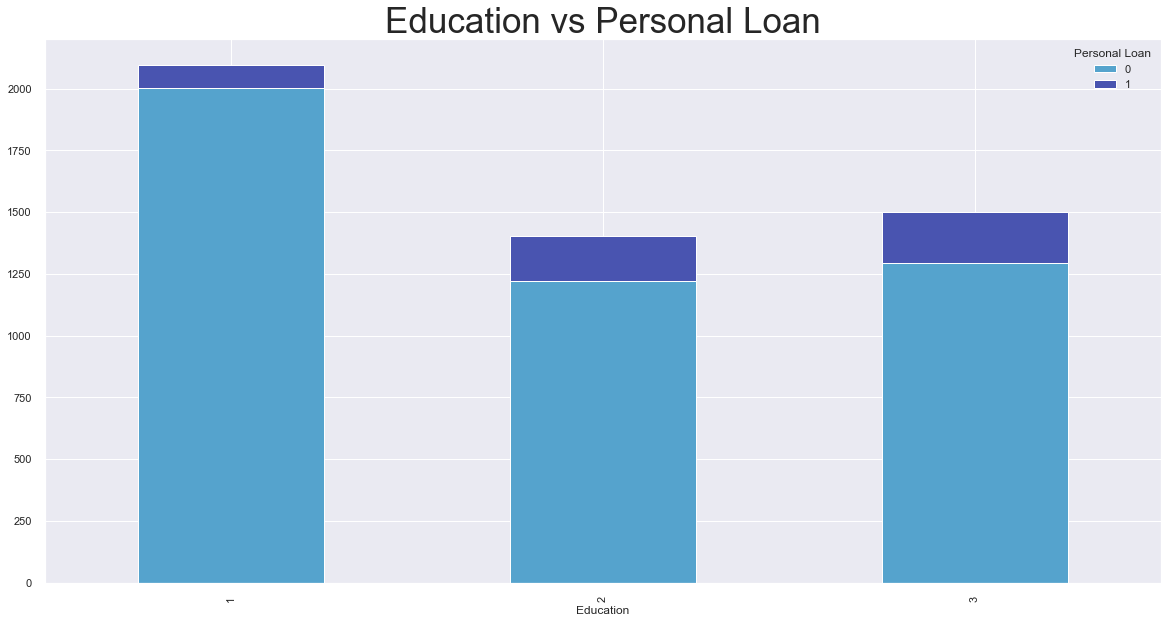

In [112]:
# influence of education on personal loan
df.groupby(['Education','Personal Loan']).size().unstack().plot(kind='bar',stacked=True, figsize=(20,10))
plt.title('Education vs Personal Loan', fontsize=35)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

30.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

34.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



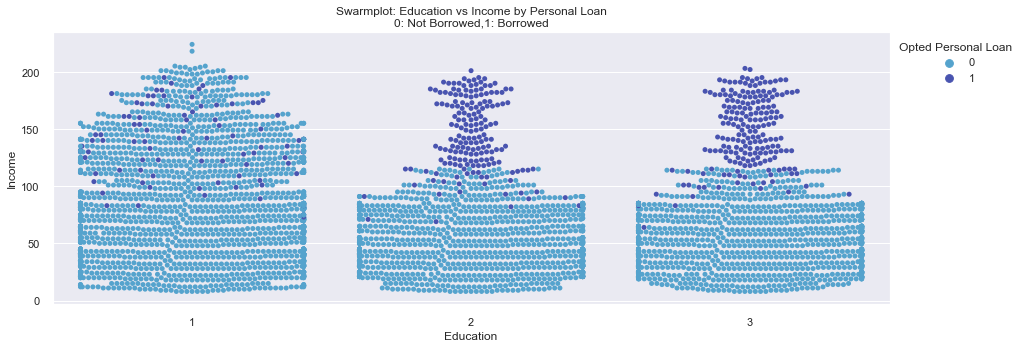

In [114]:
# Below Code shows swarm plotfor customers by Income and educational level,
# seggregated by Personal Loan opted or not

sns.set(palette='icefire')
plt.figure(figsize=(15,5))
sns.swarmplot(data=df, x='Education',y='Income',hue='Personal Loan').set(title='Swarmplot: Education vs Income by Personal Loan\n0: Not Borrowed,1: Borrowed');
plt.legend(loc='upper left',title='Opted Personal Loan', bbox_to_anchor=(1,1));

In [115]:
#Observation : Customers with higher education and higher income tend to borrow
# personal loan

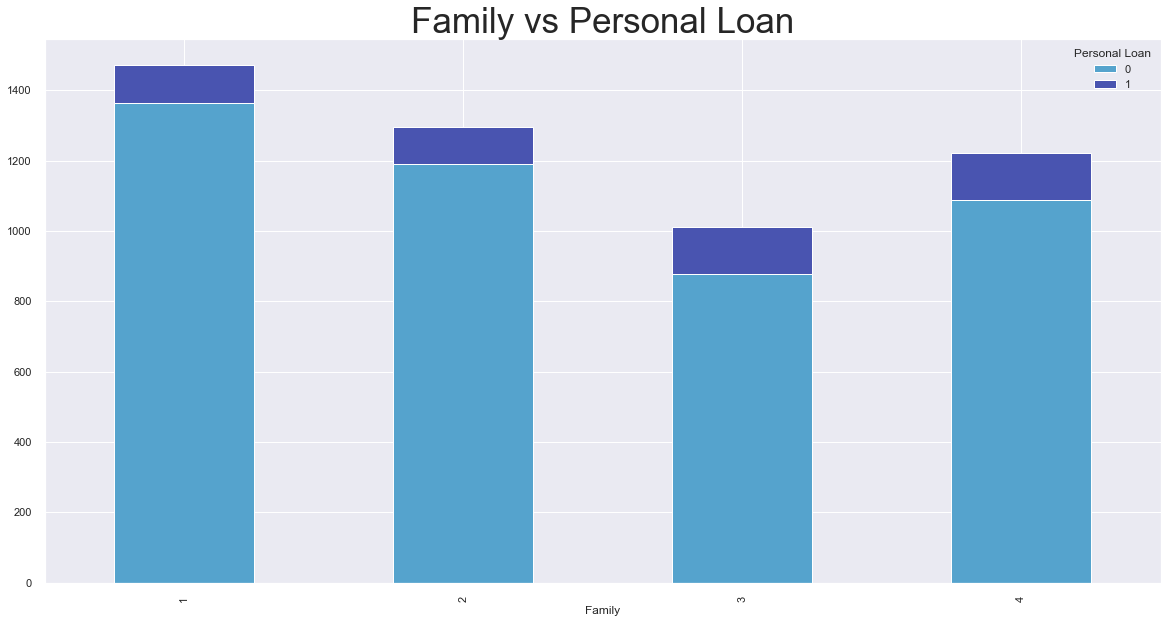

In [117]:
## Influence of family on personal loan
df.groupby(['Family','Personal Loan']).size().unstack().plot(kind='bar',stacked=True,figsize=(20,10))
plt.title('Family vs Personal Loan', fontsize=35)

plt.show()

In [121]:
# Below code shows the swarm plot for customers by Income and family size,
# segregated by Personal Loan opted or not

sns.set(palette='icefire')
plt.figure(figsize=(15,5))
sns.swarmplot(data=df,x='Family',y='Income', hue='Personal Loan').set
(title='Swarmplot: Family Size vs Income by Personal Loan\n0 : Not Borrowed, 1: Borrowed');
plt.legend(loc='Upper left', title='Opted Personal Loan', bbox_to_anchor=(1,1));

SyntaxError: invalid syntax (Temp/ipykernel_34436/3147653984.py, line 7)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

34.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

40.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



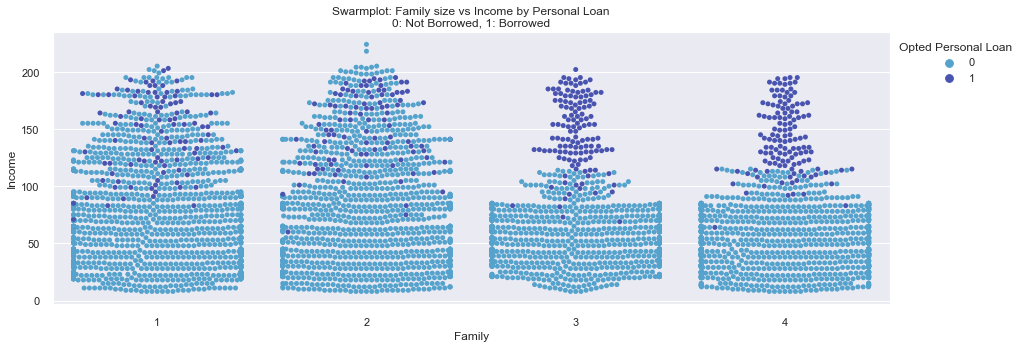

In [119]:
# Below code shows swarm plot for customers by Income and Family size, seggregated by Personal Loan opted or not

sns.set(palette='icefire')
plt.figure(figsize=(15,5))
sns.swarmplot(data=df, x='Family', y='Income', hue='Personal Loan').set(title='Swarmplot: Family size vs Income by Personal Loan\n0: Not Borrowed, 1: Borrowed');
plt.legend(loc="upper left" ,title="Opted Personal Loan", bbox_to_anchor=(1,1));

In [123]:
# Observation: Families with size of 3 are more and income>100 tend to borrow 
# personal loan 

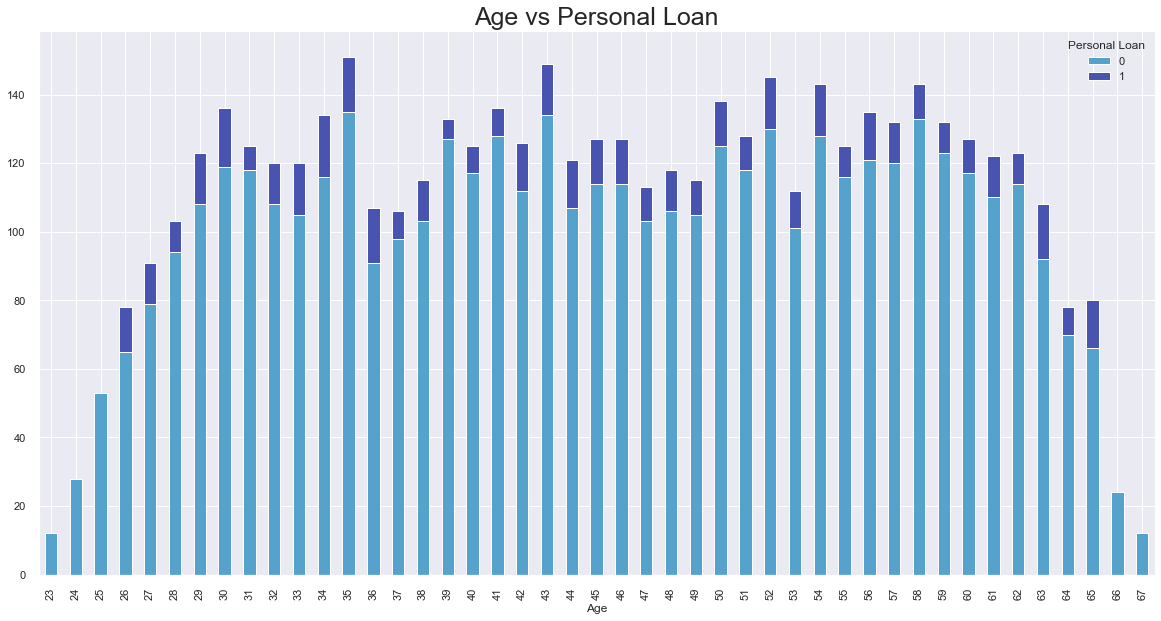

In [124]:
# influence of age on personal loans
df.groupby(['Age','Personal Loan']).size().unstack().plot(kind='bar',stacked=True,figsize=(20,10))
plt.title('Age vs Personal Loan',fontsize=25)

plt.show()

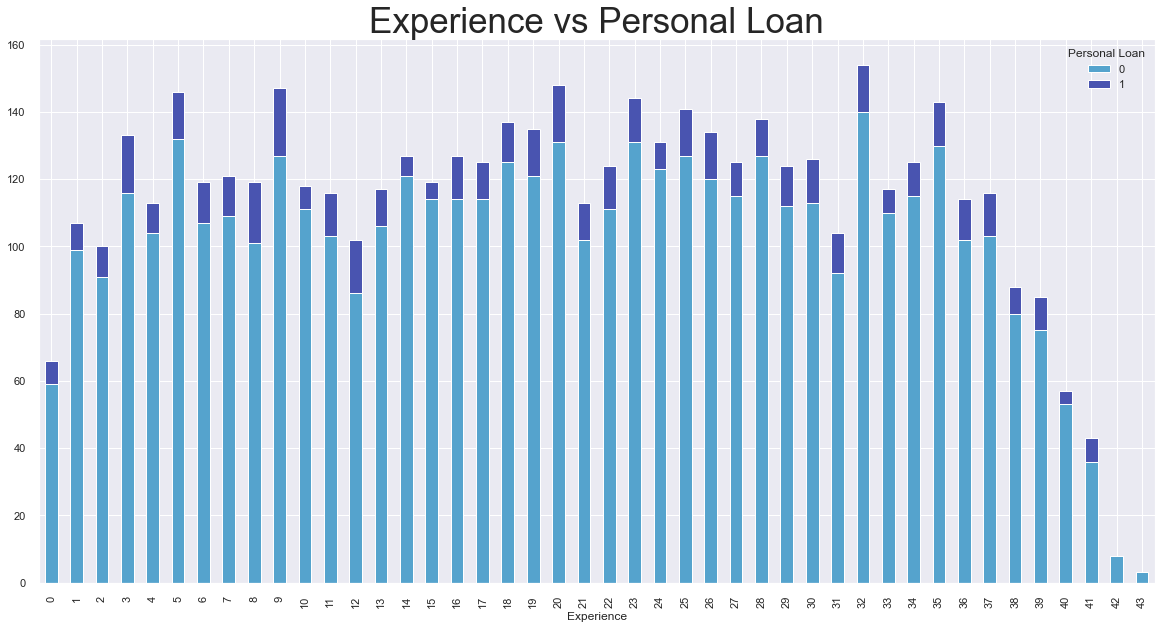

In [126]:
# influence of experience on personal loan
df.groupby(['Experience','Personal Loan']).size().unstack().plot(kind='bar',stacked=True,figsize=(20,10))
plt.title('Experience vs Personal Loan', fontsize=35)
plt.show()

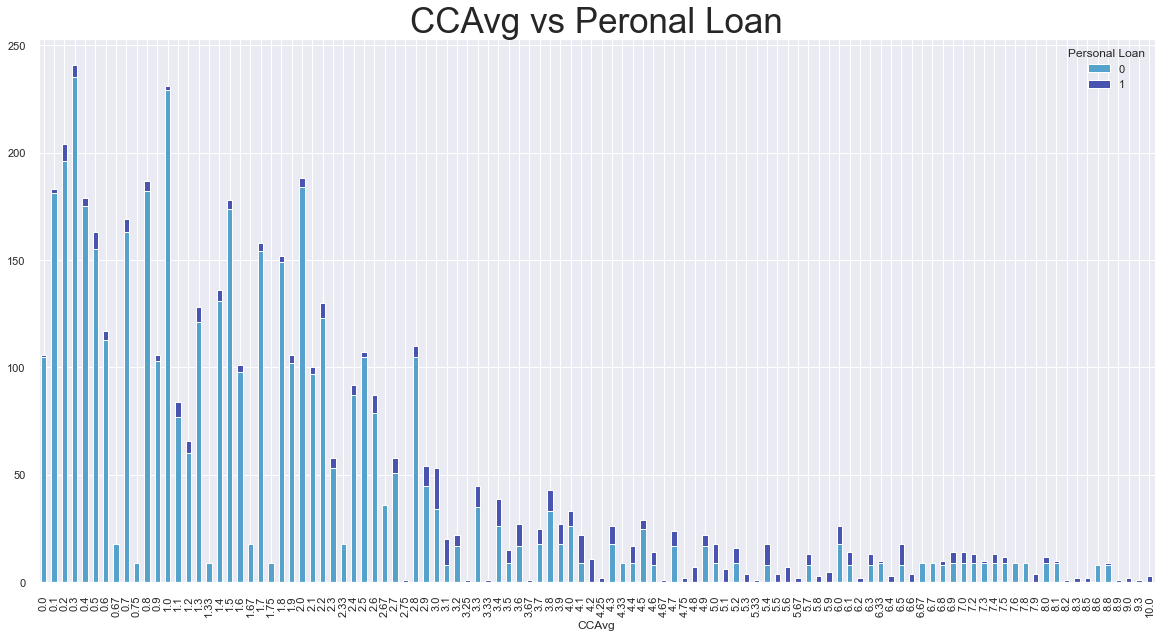

In [129]:
# influence of CCAvg on personal loan
df.groupby(['CCAvg','Personal Loan']).size().unstack().plot(kind='bar',stacked=True,figsize=(20,10))
plt.title('CCAvg vs Peronal Loan',fontsize=35)
plt.show()

In [130]:
# People with low CCAvg took loan

In [131]:
df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4994  4996   29           3      40     92697       1    1.9          3   
4995  4997   30           4      15     92037       4    0.4          1   
4996  4998   63          39      24     93023       2    0.3          3   
4997  4999   65          40      49     90034       3    0.5          2   
4998  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4994         0              0                   0           0       1   
4995        85              0                   0           0       1   
4996         0              0                   0           0       0   
4997         0              0                   0           0       1   
4998         0              0                   0           0       1   

      CreditCard Age_bin mort_bin  
0              0    0-30      NaN  
1              0   41-50      NaN  
2              0   31-40      NaN  
3              0   31-40      NaN  
4              1   31-40      NaN  
...          ...     ...      ...  
4994           0    0-30      NaN  
4995           0    0-30    0-200  
4996           0   61-67      NaN  
4997           0   61-67      NaN  
4998           1    0-30      NaN  

[4999 rows x 16 columns]

In [133]:
df.groupby(df['Personal Loan']).mean()

ID        Age  Experience      Income      ZIP Code  \
Personal Loan                                                                 
0              2512.636203  45.366010   20.164417   66.247400  93170.982740   
1              2390.650000  45.066667   19.843750  144.745833  93153.202083   

                 Family     CCAvg  Education    Mortgage  Securities Account  \
Personal Loan                                                                  
0              2.373091  1.729259   1.843328   51.800841            0.102235   
1              2.612500  3.905354   2.233333  100.845833            0.125000   

               CD Account    Online  CreditCard  
Personal Loan                                    
0                0.035849  0.595707    0.293428  
1                0.291667  0.606250    0.297917

In [134]:
# Obsevatins :People who took loan has a double the income than who don't take loan
# 2. Average spending on credit card bills is more of loan takers
# 3. Literacy Rate is also more in loan takers
# 4. Mortage value is also double of people who took loan

In [136]:
df.rename(columns={'ZIP Code':'ZIPCode'},inplace=True)

In [137]:
df.ZIPCode.nunique()

466

In [139]:
 # get unique zipcodes
list_zipcode=df.ZIPCode.unique()

In [142]:
# Here I am creating a dictionary of country by using library zipcode and matching method

dict_zip={}

for zipcode in list_zipcode:
    address=zcode.matching(zipcode.astype('str'))
    
    if len(address)==1: # If zipcodes is present then get county else, assign zipcode to county
        county = address[0].get('county')
        
    else:
            county=zipcode
            
    dict_zip.update({zipcode:county})

In [143]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

In [144]:
df['County']=df['ZIPCode'].map(dict_zip)
df

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4    1.6          1   
1        2   45          19      34    90089       3    1.5          1   
2        3   39          15      11    94720       1    1.0          1   
3        4   35           9     100    94112       1    2.7          2   
4        5   35           8      45    91330       4    1.0          2   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4994  4996   29           3      40    92697       1    1.9          3   
4995  4997   30           4      15    92037       4    0.4          1   
4996  4998   63          39      24    93023       2    0.3          3   
4997  4999   65          40      49    90034       3    0.5          2   
4998  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4994         0              0                   0           0       1   
4995        85              0                   0           0       1   
4996         0              0                   0           0       0   
4997         0              0                   0           0       1   
4998         0              0                   0           0       1   

      CreditCard Age_bin mort_bin                County  
0              0    0-30      NaN    Los Angeles County  
1              0   41-50      NaN    Los Angeles County  
2              0   31-40      NaN        Alameda County  
3              0   31-40      NaN  San Francisco County  
4              1   31-40      NaN    Los Angeles County  
...          ...     ...      ...                   ...  
4994           0    0-30      NaN         Orange County  
4995           0    0-30    0-200      San Diego County  
4996           0   61-67      NaN        Ventura County  
4997           0   61-67      NaN    Los Angeles County  
4998           1    0-30      NaN         Orange County  

[4999 rows x 17 columns]

In [145]:
df[df['County']==96651]['County'].value_counts()

96651    6
Name: County, dtype: int64

In [146]:
df[df['County']==96651].value_counts()

ID    Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard  Age_bin  mort_bin  County
631   32   7           35      96651    3       1.3    1          108       0              0                   0           0       1           31-40    0-200     96651     1
1654  26   1           24      96651    2       0.9    3          123       0              0                   0           0       1           0-30     0-200     96651     1
dtype: int64

In [148]:
# ZipCode 96651 is for laguna beach, replace it
df.replace({'County':{96651:'Laguna Beach'}},inplace=True)

In [149]:
df[df['County']==92634]['County'].value_counts()

92634    5
Name: County, dtype: int64

In [150]:
# Zip Code 92634 is fullerton
df.replace({'County':{92634:'Fullerton'}},inplace=True)

In [151]:
df[df['County']==92717]['County'].value_counts()

92717    22
Name: County, dtype: int64

In [155]:
# 92717 is for Irvine 
df.replace({'County':{92717:'Irvine'}}, inplace=True)

In [156]:
df.describe()

ID          Age   Experience       Income       ZIPCode  \
count  4999.000000  4999.000000  4999.000000  4999.000000   4999.000000   
mean   2500.923185    45.337267    20.133627    73.784757  93169.275455   
std    1443.354188    11.464033    11.416124    46.032281   1759.630610   
min       1.000000    23.000000     0.000000     8.000000  90005.000000   
25%    1251.500000    35.000000    10.000000    39.000000  91911.000000   
50%    2501.000000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.500000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  4999.000000  4999.000000  4999.000000  4999.000000    4999.000000   
mean      2.396079     1.938206     1.880776    56.510102       0.096019   
std       1.147554     1.747731     0.839804   101.720837       0.294647   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account   CD Account       Online   CreditCard  
count         4999.000000  4999.000000  4999.000000  4999.000000  
mean             0.104421     0.060412     0.596719     0.293859  
std              0.305836     0.238273     0.490605     0.455574  
min              0.000000     0.000000     0.000000     0.000000  
25%              0.000000     0.000000     0.000000     0.000000  
50%              0.000000     0.000000     1.000000     0.000000  
75%              0.000000     0.000000     1.000000     1.000000  
max              1.000000     1.000000     1.000000     1.000000

In [159]:
df.describe(include='all')

ID          Age   Experience       Income       ZIPCode  \
count   4999.000000  4999.000000  4999.000000  4999.000000   4999.000000   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean    2500.923185    45.337267    20.133627    73.784757  93169.275455   
std     1443.354188    11.464033    11.416124    46.032281   1759.630610   
min        1.000000    23.000000     0.000000     8.000000  90005.000000   
25%     1251.500000    35.000000    10.000000    39.000000  91911.000000   
50%     2501.000000    45.000000    20.000000    64.000000  93437.000000   
75%     3750.500000    55.000000    30.000000    98.000000  94608.000000   
max     5000.000000    67.000000    43.000000   224.000000  96651.000000   

             Family        CCAvg    Education     Mortgage  Personal Loan  \
count   4999.000000  4999.000000  4999.000000  4999.000000    4999.000000   
unique          NaN          NaN          NaN          NaN            NaN   
top             NaN          NaN          NaN          NaN            NaN   
freq            NaN          NaN          NaN          NaN            NaN   
mean       2.396079     1.938206     1.880776    56.510102       0.096019   
std        1.147554     1.747731     0.839804   101.720837       0.294647   
min        1.000000     0.000000     1.000000     0.000000       0.000000   
25%        1.000000     0.700000     1.000000     0.000000       0.000000   
50%        2.000000     1.500000     2.000000     0.000000       0.000000   
75%        3.000000     2.500000     3.000000   101.000000       0.000000   
max        4.000000    10.000000     3.000000   635.000000       1.000000   

        Securities Account   CD Account       Online   CreditCard Age_bin  \
count          4999.000000  4999.000000  4999.000000  4999.000000    4999   
unique                 NaN          NaN          NaN          NaN       5   
top                    NaN          NaN          NaN          NaN   51-60   
freq                   NaN          NaN          NaN          NaN    1322   
mean              0.104421     0.060412     0.596719     0.293859     NaN   
std               0.305836     0.238273     0.490605     0.455574     NaN   
min               0.000000     0.000000     0.000000     0.000000     NaN   
25%               0.000000     0.000000     0.000000     0.000000     NaN   
50%               0.000000     0.000000     1.000000     0.000000     NaN   
75%               0.000000     0.000000     1.000000     1.000000     NaN   
max               1.000000     1.000000     1.000000     1.000000     NaN   

       mort_bin              County  
count      1538                4999  
unique        4                  41  
top       0-200  Los Angeles County  
freq       1040                1095  
mean        NaN                 NaN  
std         NaN                 NaN  
min         NaN                 NaN  
25%         NaN                 NaN  
50%         NaN                 NaN  
75%         NaN                 NaN  
max         NaN                 NaN

In [160]:
df.groupby(['County','Personal Loan'])['Personal Loan'].agg({'size'}).unstack()

size       
Personal Loan               0      1
County                              
Alameda County          456.0   44.0
Butte County             17.0    2.0
Contra Costa County      73.0   12.0
El Dorado County         16.0    1.0
Fresno County            24.0    2.0
Fullerton                 5.0    NaN
Humboldt County          30.0    2.0
Imperial County           3.0    NaN
Irvine                   19.0    3.0
Kern County              47.0    7.0
Laguna Beach              6.0    NaN
Lake County               4.0    NaN
Los Angeles County      984.0  111.0
Marin County             48.0    6.0
Mendocino County          7.0    1.0
Merced County             4.0    NaN
Monterey County         113.0   15.0
Napa County               3.0    NaN
Orange County           309.0   30.0
Placer County            22.0    2.0
Riverside County         50.0    6.0
Sacramento County       169.0   15.0
San Benito County        14.0    NaN
San Bernardino County    98.0    3.0
San Diego County        509.0   59.0
San Francisco County    238.0   19.0
San Joaquin County       12.0    1.0
San Luis Obispo County   28.0    5.0
San Mateo County        192.0   12.0
Santa Barbara County    143.0   11.0
Santa Clara County      492.0   71.0
Santa Cruz County        60.0    8.0
Shasta County            15.0    3.0
Siskiyou County           7.0    NaN
Solano County            30.0    3.0
Sonoma County            22.0    6.0
Stanislaus County        14.0    1.0
Trinity County            4.0    NaN
Tuolumne County           7.0    NaN
Ventura County          103.0   11.0
Yolo County             122.0    8.0

<AxesSubplot:ylabel='County'>

<Figure size 1080x1728 with 0 Axes>

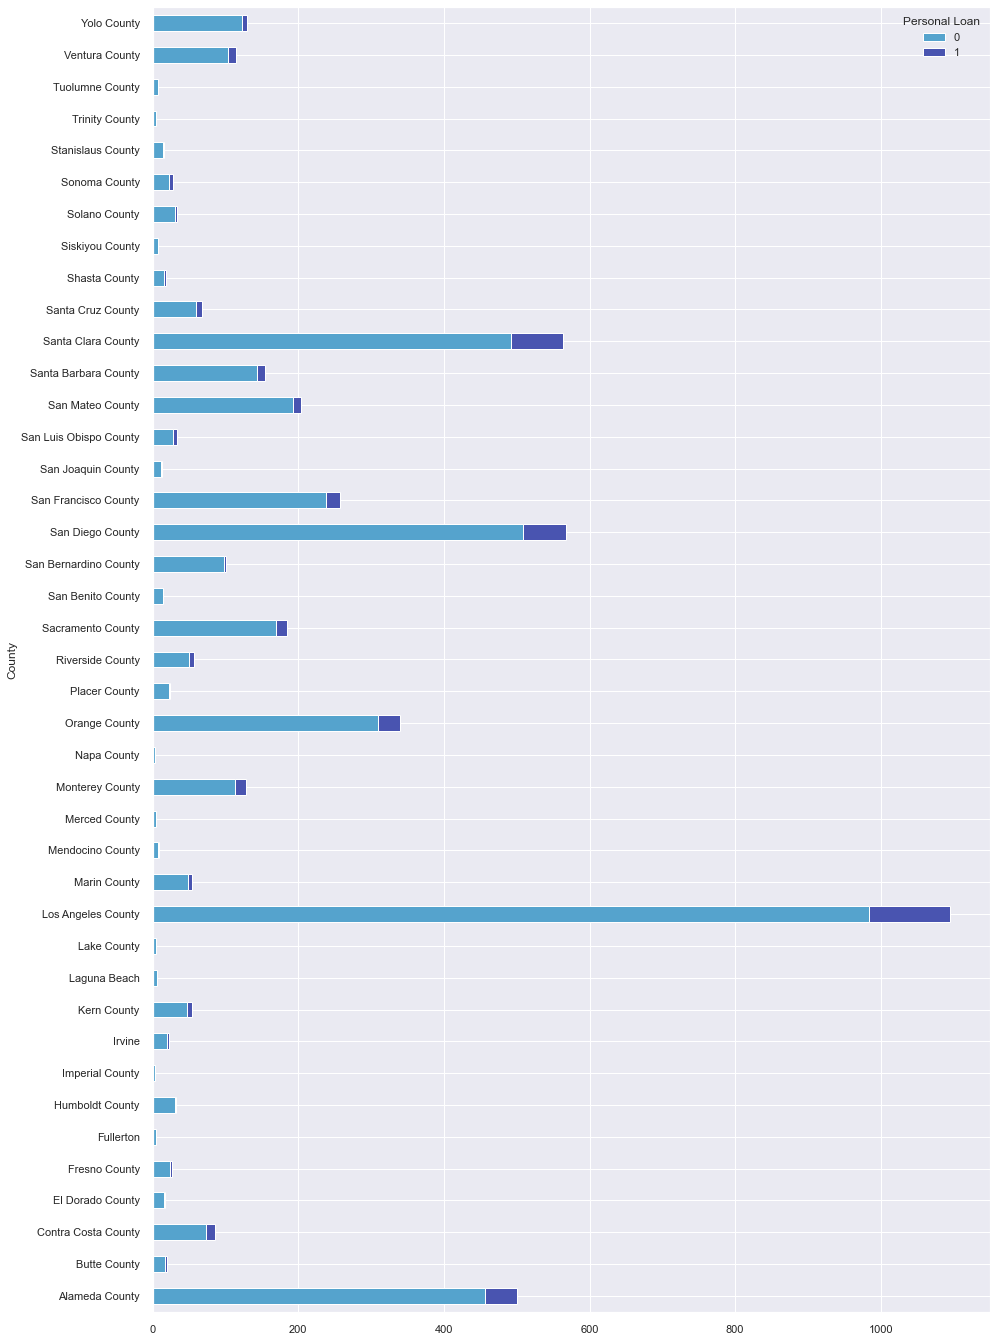

In [166]:
plt.figure(figsize=(15,24))

pd.crosstab(index=df['County'],columns=df['Personal Loan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(15,24))


<AxesSubplot:ylabel='County'>

<Figure size 1080x1728 with 0 Axes>

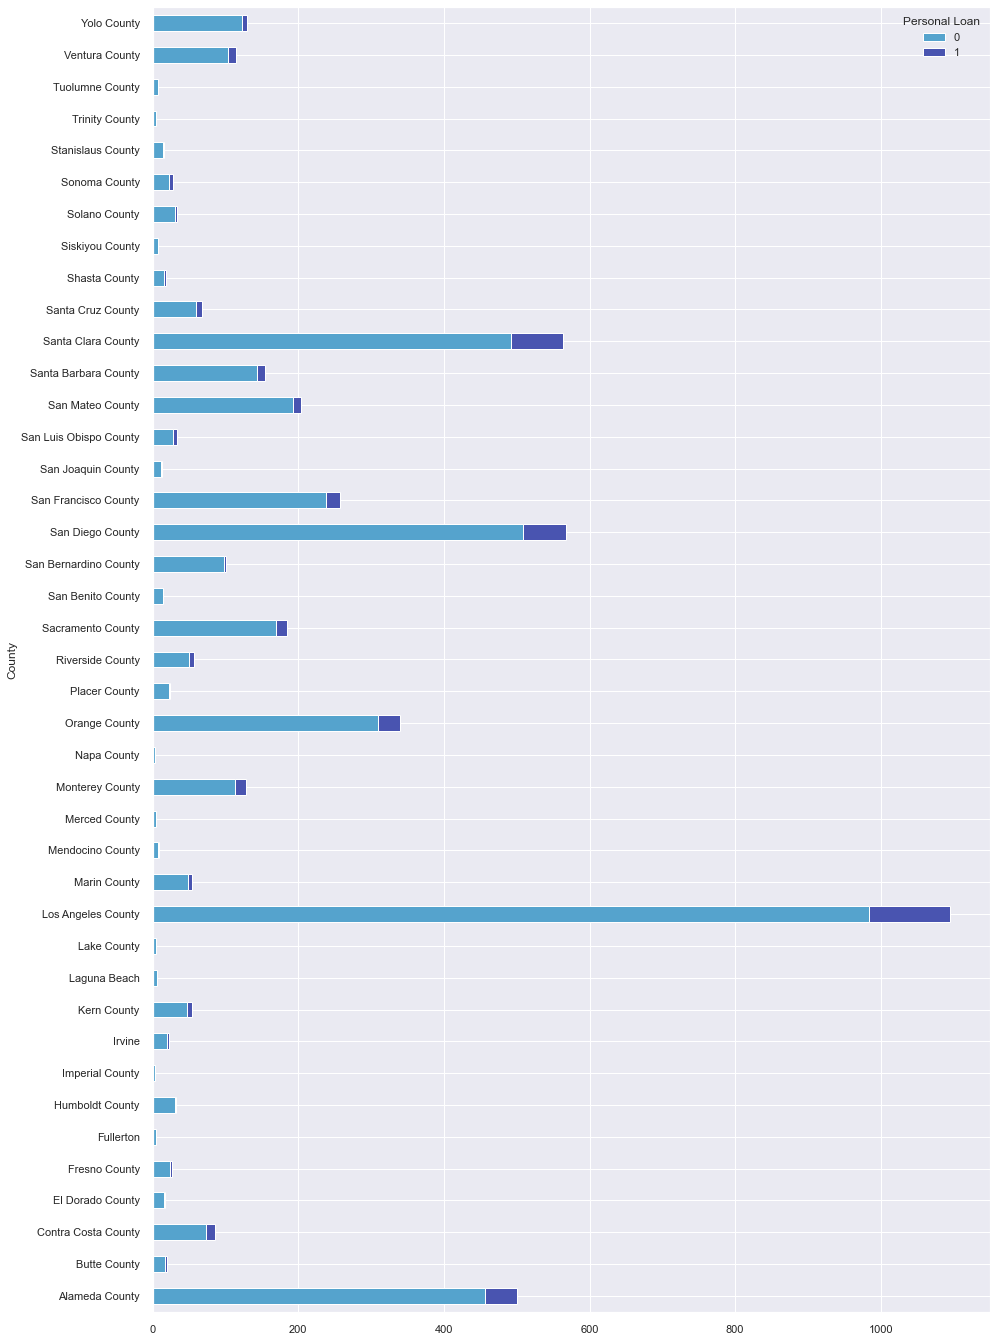

In [164]:
plt.figure(figsize=(15,24))

pd.crosstab(index=df['County'],columns=df['Personal Loan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(15,24))

In [167]:
# Observation:
'''
1. The largest number of customers were from Los Angeles , followed by San diego
   and Santa Clara
2. The largest number of customers who took loan were from Los Angeles,San Diego
   and Santa Clara
'''

'\n1. The largest number of customers were from Los Angeles , followed by San diego\n   and Santa Clara\n2. The largest number of customers who took loan were from Los Angeles,San Diego\n   and Santa Clara\n'

In [171]:
df

ID  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0        1   25           1      49       4    1.6          1         0   
1        2   45          19      34       3    1.5          1         0   
2        3   39          15      11       1    1.0          1         0   
3        4   35           9     100       1    2.7          2         0   
4        5   35           8      45       4    1.0          2         0   
...    ...  ...         ...     ...     ...    ...        ...       ...   
4994  4996   29           3      40       1    1.9          3         0   
4995  4997   30           4      15       4    0.4          1        85   
4996  4998   63          39      24       2    0.3          3         0   
4997  4999   65          40      49       3    0.5          2         0   
4998  5000   28           4      83       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4994              0                   0           0       1           0   
4995              0                   0           0       1           0   
4996              0                   0           0       0           0   
4997              0                   0           0       1           0   
4998              0                   0           0       1           1   

     Age_bin mort_bin                County  
0       0-30      NaN    Los Angeles County  
1      41-50      NaN    Los Angeles County  
2      31-40      NaN        Alameda County  
3      31-40      NaN  San Francisco County  
4      31-40      NaN    Los Angeles County  
...      ...      ...                   ...  
4994    0-30      NaN         Orange County  
4995    0-30    0-200      San Diego County  
4996   61-67      NaN        Ventura County  
4997   61-67      NaN    Los Angeles County  
4998    0-30      NaN         Orange County  

[4999 rows x 16 columns]

In [172]:
# Drop Columns which does not effect our target columns personal

# df.drop('ZIPCode',axis=1,inplace =True)
df.drop('County',axis=1,inplace=True)
df.drop('ID',axis=1,inplace=True)
df.drop('Age_bin',axis=1,inplace=True)
df.drop('mort_bin',axis=1,inplace=True)

### 5- Correlation

<AxesSubplot:>

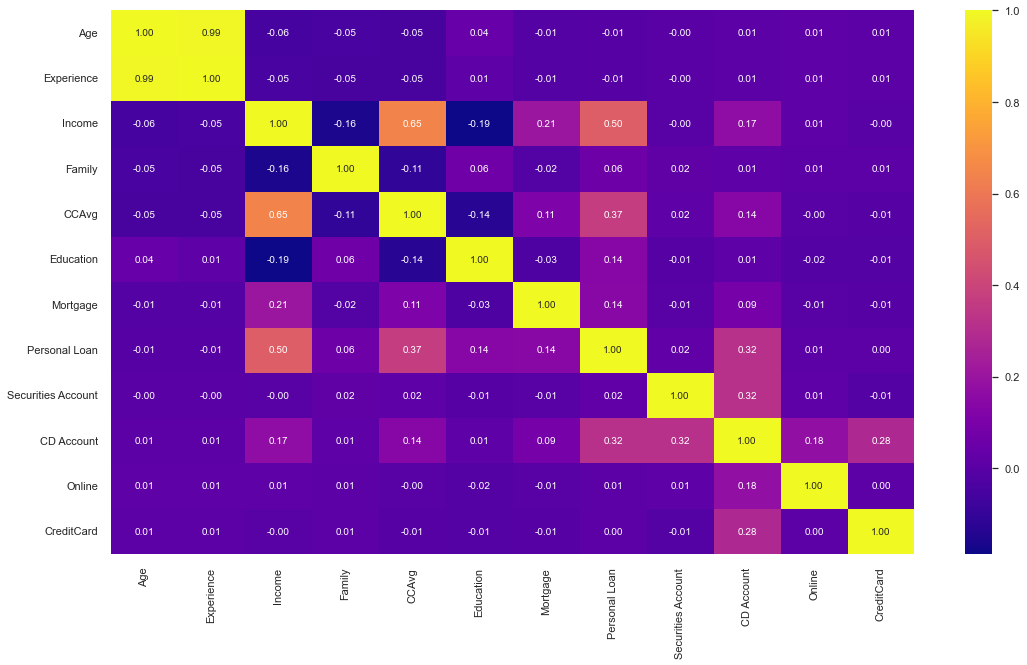

In [174]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),cmap='plasma',annot=True, fmt='.2f')

In [175]:
# Checking correlation of independen variable with the dependent variable i,e personal loan

df.corr()['Personal Loan'].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502459
CCAvg                 0.366864
CD Account            0.316344
Mortgage              0.142065
Education             0.136834
Family                0.061471
Securities Account    0.021932
Online                0.006332
CreditCard            0.002903
Age                  -0.007694
Experience           -0.008276
Name: Personal Loan, dtype: float64

In [176]:
# Observations
'''
1. Age and Experience are highly correlated
2. 'Income'  and 'CCAvg' is moderately correlated
3. Personal Loan has maximum correlation with 'Income','CCAvg','CD Account','Mortgage'and 'Education',
4. There is association of 'CD Account' with 'Credit Card','Securities Account','Online','CCAvg' and 'Income'
5. 'Mortgage has a moderate correlation with 'Income'
6. 'Income' influences 'CCAvg','Personal Loan','CD Account' and Mortgage
'''

"\n1. Age and Experience are highly correlated\n2. 'Income'  and 'CCAvg' is moderately correlated\n3. Personal Loan has maximum correlation with 'Income','CCAvg','CD Account','Mortgage'and 'Education',\n4. There is association of 'CD Account' with 'Credit Card','Securities Account','Online','CCAvg' and 'Income'\n5. 'Mortgage has a moderate correlation with 'Income'\n6. 'Income' influences 'CCAvg','Personal Loan','CD Account' and Mortgage\n"

In [177]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4994   29           3      40       1    1.9          3         0   
4995   30           4      15       4    0.4          1        85   
4996   63          39      24       2    0.3          3         0   
4997   65          40      49       3    0.5          2         0   
4998   28           4      83       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4994              0                   0           0       1           0  
4995              0                   0           0       1           0  
4996              0                   0           0       0           0  
4997              0                   0           0       1           0  
4998              0                   0           0       1           1  

[4999 rows x 12 columns]

#### 6- Model Building

### Logistic Regression

In [234]:
# independent Variable
x=df.drop(['Personal Loan'],axis=1)
#y= df['Personal Loan'].values.reshape(-1,1) # target
y=df['Personal Loan']

In [235]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [236]:
x_train.shape

(3499, 11)

In [237]:
x_test.shape

(1500, 11)

In [238]:
lr = LogisticRegression()

In [239]:
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [240]:
y_predict = lr.predict(x_test)

In [241]:
y_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

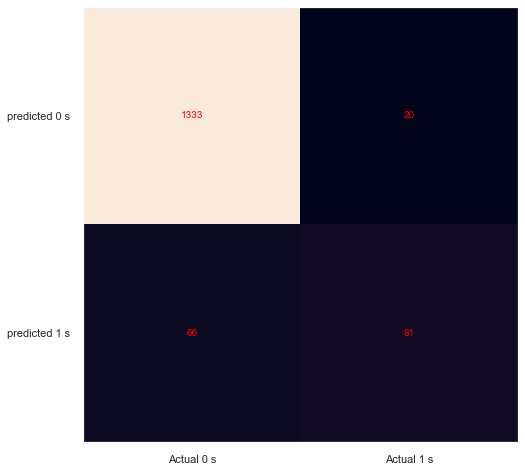

In [242]:
cm =confusion_matrix(y_test,y_predict)
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Actual 0 s','Actual 1 s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('predicted 0 s','predicted 1 s'))
ax.set_ylim(1.5,-0.5)
for i in range (2):
    for j in range (2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

In [243]:
from sklearn.metrics import mean_squared_error

In [244]:
mean_squared_error(y_predict,y_test)

0.05733333333333333

In [245]:
accuracy_score(y_test,y_predict)

0.9426666666666667

### Normalize

In [246]:
from sklearn.preprocessing import StandardScaler

In [247]:
df1 = df.copy()
scaler = StandardScaler()

In [248]:
scaler.fit_transform(df1)

array([[-1.77418389, -1.67618549, -0.53847509, ..., -0.25356727,
        -1.21641387, -0.64509481],
       [-0.02942256, -0.09931043, -0.86436597, ..., -0.25356727,
        -1.21641387, -0.64509481],
       [-0.55285096, -0.44972711, -1.36406532, ..., -0.25356727,
        -1.21641387, -0.64509481],
       ...,
       [ 1.54086263,  1.65277297, -1.08162655, ..., -0.25356727,
        -1.21641387, -0.64509481],
       [ 1.71533877,  1.74037714, -0.53847509, ..., -0.25356727,
         0.82208862, -0.64509481],
       [-1.51246969, -1.41337298,  0.20021091, ..., -0.25356727,
         0.82208862,  1.55015974]])

In [259]:
x1= df1.drop(['Personal Loan'],axis=1)
y1= df1['Personal Loan'].values.reshape(-1,1) # target

In [260]:
x1_train,y1_train,x1_test,y1_test = train_test_split(x1,y1,test_size=0.3,random_state=0)

In [261]:
lr1 = LogisticRegression()

In [255]:
[y[y]]

[0    0
 0    0
 0    0
 0    0
 0    0
     ..
 0    0
 0    0
 0    0
 0    0
 0    0
 Name: Personal Loan, Length: 4999, dtype: int64]

In [264]:
y1.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [265]:
lr1.fit(x1_train,y1_train)

ValueError: y should be a 1d array, got an array of shape (1500, 11) instead.

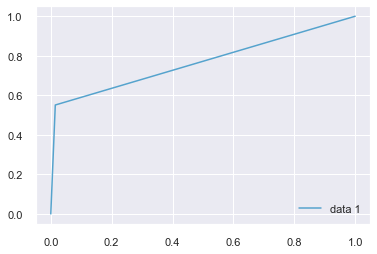

In [267]:
fpr,tpr,_ = metrics.roc_curve(y_test,y_predict)
plt.plot(fpr,tpr,label='data 1')
plt.legend(loc=4)
plt.show()

In [276]:
# get the test size

test_size = np.arange(start=0.1, stop=0.3,step=0.05)
score=[]
for size in test_size:
    log_model = LogisticRegression(solver='newton-cg',C=1,n_jobs=-1,random_state=0)
    log_model.fit(x_train,y_train.ravel())
    score.append(log_model.score(x_test,y_test))
result = pd.DataFrame({'test_size':test_size,'score': score})
result[result['score']==result['score'].max()]

test_size     score
0       0.10  0.947333
1       0.15  0.947333
2       0.20  0.947333
3       0.25  0.947333

In [277]:
y_predict_proba = log_model.predict(x_test)[::,1]
fpr,tpr,_ = mertics.roc_curve(y_test,y_predict_proba)
plt.plot(fpr,tpr,label='data 1')
plt.legend(loc=4)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [278]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1353
           1       0.80      0.55      0.65       147

    accuracy                           0.94      1500
   macro avg       0.88      0.77      0.81      1500
weighted avg       0.94      0.94      0.94      1500



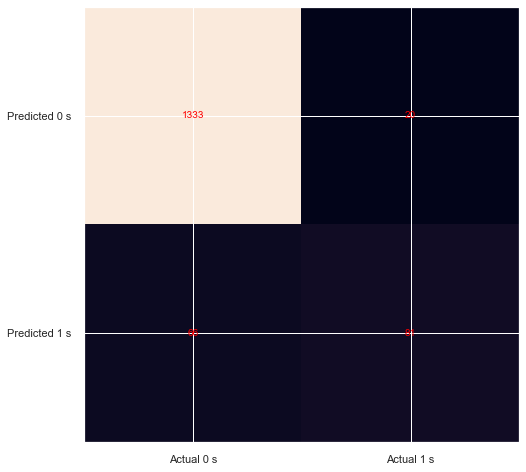

In [286]:
cm = confusion_matrix(y_test,y_predict)
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=('Actual 0 s','Actual 1 s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Predicted 0 s', 'Predicted 1 s'))
ax.set_ylim(1.5,-0.5)
for i in range (2):
    for j in range (2):
        ax.text(j,i,cm[i,j], ha='center',va='center',color='red')
plt.show()

In [287]:
# append sample for predict
df2 = pd.DataFrame({'Age':[42],'Experience':[16],'Income':[30],'Family':[3],'CCAvg':[1.2],'Education':[3],'Mortgage':[0],'Personal Loan':[0],'Securities Account':[1],'CD Account':[0],'Online':[1],'CreditCard':[1]})
df2

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   42          16      30       3    1.2          3         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       1           1

In [289]:
data2=df.append(df2)
data2

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   30           4      15       4    0.4          1        85   
4996   63          39      24       2    0.3          3         0   
4997   65          40      49       3    0.5          2         0   
4998   28           4      83       3    0.8          1         0   
0      42          16      30       3    1.2          3         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       0           0  
4997              0                   0           0       1           0  
4998              0                   0           0       1           1  
0                 0                   1           0       1           1  

[5000 rows x 12 columns]

In [291]:
# Predicting Added Sample
x_train =data2.drop(['Personal Loan'],axis=1)[0:4998] # Feature
y_train = data2['Personal Loan'][:4998] # target
x_test = data2.drop(['Personal Loan'],axis=1)[4998:]
log_model = LogisticRegression(solver='newton-cg', C=1,n_jobs=-1, random_state=0)
log_model.fit(x_train,y_train)

LogisticRegression(C=1, n_jobs=-1, random_state=0, solver='newton-cg')

In [292]:
y_pred = log_model.predict(x_test)
y_pred

array([0, 0], dtype=int64)

In [293]:
# This customer don't accept personal loan

### K-Nearest Neghbor

In [317]:
#Independent Variables
x=df.drop(['Personal Loan'],axis=1)
y= df['Personal Loan'].values.reshape(-1,1)

In [305]:
training_acc=[]
test_acc=[]
# try KNN for different k neareset neighbors from 1 to 20
neighbors_setting= range(1,20)
for n_neighbors in neighbors_setting:
    KNN= KNeighborsClassifier(n_neighbors=n_neighbors)
    KNN.fit(x_train,y_train.ravel())
    training_acc.append(KNN.score(x_train,y_train))
    test_acc.append(KNN.score(x_test,y_test))
plt.plot(neighbors_setting,training_acc,label='Accuracy of training set')
plt.plot(neighbors_setting,test_acc, label="Accuracy of test set")
plt.xlabel('numbers of neighbors',fontsize=20)
plt.grid()
plt.legend()

ValueError: Found input variables with inconsistent numbers of samples: [1500, 2]

In [318]:
training_acc=[]
test_acc=[]
#try KNN for different k nearest neighbors from 1 to 20.
neighbors_setting= range(1,20)
for n_neighbors in neighbors_setting:
    KNN= KNeighborsClassifier(n_neighbors=n_neighbors)
    KNN.fit(x_train,y_train.ravel())
    training_acc.append(KNN.score(x_train, y_train))
    test_acc.append(KNN.score(x_test, y_test))
    
plt.plot(neighbors_setting,training_acc, label= 'Accuracy of the training set') 
plt.plot(neighbors_setting,test_acc, label= 'Accuracy of the test set') 
plt.xlabel('number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.grid()
plt.legend()

ValueError: Found input variables with inconsistent numbers of samples: [1500, 2]

In [313]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1,50)}
grid_kn = GridSearchCV(estimator=KNN,# model
                       param_grid=parameters,# '''range k'''
                       scoring='accuracy', #'''Strategy to evaluate the performance of cross validation model on test set'''
                       cv =10, #'''cross_validation generator'''
                       verbose=1,# '''Time of calculation'''
                       n_jobs=-1)# '''help to CPU'''
grid_kn.fit(x_train,y_train.ravel())

Fitting 10 folds for each of 49 candidates, totalling 490 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=1), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [308]:
from sklearn.model_selection import GridSearchCV
parametrs={'n_neighbors': range(1,50)}
grid_kn= GridSearchCV(estimator=KNN ,  #model
                       param_grid=parametrs, #range k
                       scoring='accuracy',#strategy to evaluate the performance
                        #of the csoss_validation model on the test set
                       cv=10,   # cross_validation generator
                       verbose=1,  #Time of calculate
                       n_jobs=-1)  # help to CPU
grid_kn.fit(x_train,y_train.ravel())

Fitting 10 folds for each of 49 candidates, totalling 490 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=1), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [314]:
grid_kn.best_params_

{'n_neighbors': 5}

In [319]:
k=20 # 1 to 20
Acc = np.zeros((k))
for i in range (1,k+1):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train.ravel())
    y_pred = clf.predict(x_test)
    Acc[i-1]= metrics.accuracy_score(y_test,y_pred)
    
Acc

ValueError: Found input variables with inconsistent numbers of samples: [1500, 2]

In [320]:
print(np.max(ACC))
print(np.min(Acc))

NameError: name 'ACC' is not defined

In [322]:
# split X and Y in training and test set in 75:25 raio
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [325]:
k=3
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(x_train,y_train.ravel())
y_pred = clf.predict(x_test)

In [326]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9152


In [327]:
clf_confusion_matrix = confusion_matrix(y_test,y_pred)
print(clf_confusion_matrix)
print('\nTrue Positive =', clf_confusion_matrix[1][1])
print( 'True Negative =', clf_confusion_matrix[0][0])
print( 'False Positve =', clf_confusion_matrix[0][1])
print( 'False Negative =', clf_confusion_matrix[1][0])

[[1090   36]
 [  70   54]]

True Positive = 54
True Negative = 1090
False Positve = 36
False Negative = 70


In [329]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1126
           1       0.60      0.44      0.50       124

    accuracy                           0.92      1250
   macro avg       0.77      0.70      0.73      1250
weighted avg       0.91      0.92      0.91      1250



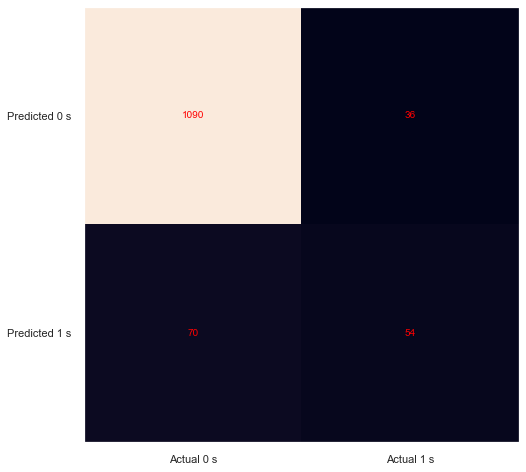

In [332]:
cm = confusion_matrix(y_test,y_pred)
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Actual 0 s','Actual 1 s'))
ax.yaxis.set(ticks=(0,1),ticklabels= ('Predicted 0 s','Predicted 1 s'))
ax.set_ylim(1.5,-0.5)


for i in range (2):
    for j in range (2):
        ax.text(j,i,cm[i,j], ha ='center',va='center',color='red')

plt.show()

In [333]:
k=3
clf2 = KNeighborsClassifier(n_neighbors =k, algorithm='auto',leaf_size=30,metric='manhattan',metric_params=None,weights='distance')
clf2.fit(x_train,y_train.ravel())
y_pred= clf.predict(x_test)

In [334]:
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9152


In [337]:
clf2_confusion_matrix = confusion_matrix(y_test,y_pred)
print(clf2_confusion_matrix)
print('\n True Positive =', clf2_confusion_matrix[1][1])
print( 'True Negative =',clf2_confusion_matrix[0][0])
print( 'False Positive =',clf2_confusion_matrix[0][1])
print( 'False Negative =', clf2_confusion_matrix[1][0])

[[1090   36]
 [  70   54]]

 True Positive = 54
True Negative = 1090
False Positive = 36
False Negative = 70


In [339]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9152


In [340]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1126
           1       0.60      0.44      0.50       124

    accuracy                           0.92      1250
   macro avg       0.77      0.70      0.73      1250
weighted avg       0.91      0.92      0.91      1250



#### Normailize

In [345]:
df2 =df

In [346]:
from sklearn import preprocessing

In [348]:
k_scaler = preprocessing.StandardScaler(). fit(df2)
scale2 = k_scaler.transform(df2.astype(float))

In [349]:
x_scale2 = df2.drop(['Personal Loan'], axis=1)
y_scale2 = df['Personal Loan'].values.reshape(-1,1)

In [350]:
# Split x and y in training and test set in 80:20 ratio
x_train, x_test,y_train,y_test= train_test_split(x_scale2,y_scale2,test_size=0.2,random_state=0)

In [351]:
knn_scale_model = KNeighborsClassifier(n_neighbors = 3)
knn_scale_model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=3)

In [352]:
y_pred = knn_scale_model.predict(x_test)

In [353]:
accuracy_score(y_test,y_pred)

0.911

In [355]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       899
           1       0.58      0.45      0.50       101

    accuracy                           0.91      1000
   macro avg       0.76      0.70      0.73      1000
weighted avg       0.90      0.91      0.91      1000



In [356]:
# Predict Added Sample
x_train = data2.drop(['Personal Loan'],axis=1)[:4998] # Feature
y_train = data2['Personal Loan'][:4998]
x_test = data2.drop('Personal Loan',axis=1)[4998:]

lclf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train.ravel())
y_pred=clf.predict(x_test)

In [357]:
y_pred

array([0, 0], dtype=int64)

In [358]:
# This customer does not accept the personal Loan

#### Naive Bayes

In [359]:
CNBmodel = ComplementNB()

In [360]:
# split x and y in training and test set in 80:20 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [361]:
CNBmodel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



ComplementNB()

In [364]:
y_pred = CNBmodel.predict(x_test)

In [365]:
print('Accuracy :', metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.743


In [366]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84       899
           1       0.24      0.69      0.35       101

    accuracy                           0.74      1000
   macro avg       0.60      0.72      0.60      1000
weighted avg       0.88      0.74      0.79      1000



In [370]:
CNB_confusion_matrix = confusion_matrix(y_test,y_pred)

print(CNB_confusion_matrix)
print('\nTrue Positive :', CNB_confusion_matrix[1][1])
print( 'True Negative :', CNB_confusion_matrix[0][0])
print( 'False Positive :', CNB_confusion_matrix[0][1])
print( 'False Negative :', CNB_confusion_matrix[1][0])

[[673 226]
 [ 31  70]]

True Positive : 70
True Negative : 673
False Positive : 226
False Negative : 31


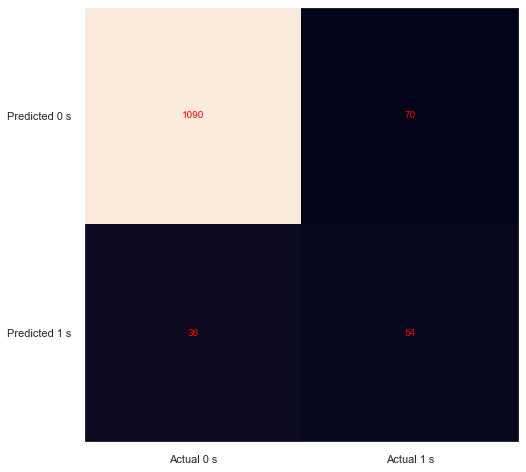

In [373]:
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks= (0,1),ticklabels = ('Actual 0 s', 'Actual 1 s'))
ax.yaxis.set(ticks = (0,1), ticklabels = ('Predicted 0 s', 'Predicted 1 s'))
ax.set_ylim(1.5,-0.5)
for i in range (2):
    for j in range (2):
        ax.text(j,i,cm[j,i],ha='center',va='center', color='red')
plt.show()

### Comparing all models for Personal Loan prediction

In [375]:
All_
8
models={'Models':['Logistic Regressioin','K-Nearest Neighbors','Naive Bayes'],
          'Accuracy':[0.9496,0.9152,0.7384],
          'F1_score(0)':[0.97,0.95,0.84],
          'F1_score(1)':[0.70,0.50,0.35],
          'True Positive':[74,54,88],
          'True Negative':[1113,1090,835],
          'False Positve': [13,36,291],
          'False Negative':[50,70,36]}

comparison = pd.DataFrame(All_models)
comparison

Models  Accuracy  F1_score(0)  F1_score(1)  True Positive  \
0  Logistic Regressioin    0.9496         0.97         0.70             74   
1   K-Nearest Neighbors    0.9152         0.95         0.50             54   
2           Naive Bayes    0.7384         0.84         0.35             88   

   True Negative  False Positve  False Negative  
0           1113             13              50  
1           1090             36              70  
2            835            291              36

In [379]:
# Compare Accuracy in all modelsfig,ax = plt.subplots(fgisize=(10,8))
sns.barplot(x='Model',y='Accuracy',data=comparison)
ax.set_title('F1 Score of Data',pad=20)
ax.set_xlabel('Models',labelpad=20)
ax.sety_label('Accuracy', labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width,height = p.get_width(),p,get_height()
    x,y = p.get_xy()
    ax.annotate('{:.0%}'.format(height), (x+ 0.25,y+height+0.1))

ValueError: Could not interpret input 'Model'